# Run one sample correlation test for control PBMCs

In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pybedtools import BedTool
import pickle as pkl
import itertools
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg')
sys.path.append('/home/ssm-user/Github/misc-seq/miscseq/')
import encode
import memento

In [4]:
data_path = '/data_volume/ifn_hbec/'
fig_path = '/home/ssm-user/Github/scrna-parameter-estimation/figures/fig5/main/'

### Check the result in PBMCs

In [5]:
fig_path = '/home/ssm-user/Github/scrna-parameter-estimation/figures/fig4/supp/'
data_path = '/data_volume/parameter_estimation/'

### Read PBMC dataset and setup memento

In [6]:
cts = ['CD4 T cells',  'CD14+ Monocytes', 'FCGR3A+ Monocytes', 'NK cells','CD8 T cells', 'B cells']
label_converter = dict(zip(cts, ['Th', 'cM', 'ncM', 'NK', 'Tc', 'B']))

In [7]:
def simplify_name(name):
    return name.split('.')[0]

In [8]:
adata = sc.read(data_path + 'interferon_filtered.h5ad')

In [9]:
adata.obs['q'] = 0.07

In [10]:
memento.setup_memento(adata, q_column='q', trim_percent=0.1)

#### Isolate the control cells and perform one sample test

In [11]:
adata_ctrl = adata.copy()[(adata.obs['cell']=='CD14+ Monocytes') & (adata.obs['stim']=='ctrl')].copy()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


### Define TFs

In [12]:
filtered_tfs = """MAFG
SPI1
ZNF655
MAX
ATF4
ATF3
IRF2
IRF1
ARID5A
BACH1
YY1
HMGA1
IRF7
STAT1
NR1H2
XBP1
ETV6
MSC
ATF5
MAFB
FOS
CEBPB
BBX
STAT3
REL
JUN
CEBPD
DDIT3
NR3C1
TGIF1
ZNF267
NFE2L2
HIF1A
AHR
GTF2B
CREM
HBP1
RELB
TFEC
YBX1
ELF1
JUNB
NFKB1
IRF9
RBPJ
KLF6""".split()

### One sample test for all TFs

In [13]:
adata_ctrl = adata.copy()[(adata.obs['cell']=='CD14+ Monocytes') & (adata.obs['stim']=='ctrl')].copy()

In [14]:
adata_ctrl.obs.head(2)

tsne1      tsne2   ind  stim cluster             cell  \
index                                                                         
AAACATACATTTCC-1 -27.640373  14.966629  1016  ctrl       9  CD14+ Monocytes   
AAACATACCAGAAA-1 -27.493646  28.924885  1256  ctrl       9  CD14+ Monocytes   

                 multiplets  n_genes_by_counts  log1p_n_genes_by_counts  \
index                                                                     
AAACATACATTTCC-1    singlet                878                 6.778785   
AAACATACCAGAAA-1    singlet                713                 6.570883   

                  total_counts  log1p_total_counts  total_counts_mt  \
index                                                                 
AAACATACATTTCC-1        3018.0            8.012681              0.0   
AAACATACCAGAAA-1        2481.0            7.816820              0.0   

                  log1p_total_counts_mt  pct_counts_mt  total_counts_hb  \
index                                                                     
AAACATACATTTCC-1                    0.0            0.0              0.0   
AAACATACCAGAAA-1                    0.0            0.0              0.0   

                  log1p_total_counts_hb  pct_counts_hb  \
index                                                    
AAACATACATTTCC-1                    0.0            0.0   
AAACATACCAGAAA-1                    0.0            0.0   

                               cell_type     q  memento_size_factor  
index                                                                
AAACATACATTTCC-1  CD14+ Monocytes - ctrl  0.07             1.385846  
AAACATACCAGAAA-1  CD14+ Monocytes - ctrl  0.07             0.879082

In [15]:
adata_ctrl.obs['group'] = 'A'

In [16]:
memento.create_groups(adata_ctrl, label_columns=['ind'])

In [17]:
memento.compute_1d_moments(adata_ctrl, min_perc_group=.8)

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/estimator.py:105: RuntimeWarning: invalid value encountered in log


In [18]:
for tf in ['IRF7']:
    
    if tf not in adata_ctrl.var.index.tolist():
        continue
    
    print('Control correlations for:', tf)
    
    memento.compute_2d_moments(adata_ctrl, list(itertools.product([tf], adata_ctrl.var.index.tolist())))
    
    memento.ht_2d_moments( 
        adata_ctrl, 
        formula_like='1',
        cov_column='Inter', 
        num_boot=10000, 
        verbose=1,
        num_cpus=14)
    
    adata_ctrl.write(data_path + 'control_corr/{}.h5ad'.format(tf))

Control correlations for: IRF7


[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    4.2s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:   15.3s
[Parallel(n_jobs=14)]: Done 422 tasks      | elapsed:   31.9s
[Parallel(n_jobs=14)]: Done 772 tasks      | elapsed:   56.9s
[Parallel(n_jobs=14)]: Done 1222 tasks      | elapsed:  1.5min
[Parallel(n_jobs=14)]: Done 1742 out of 1742 | elapsed:  2.1min finished
... storing 'group' as categorical
... storing 'memento_group' as categorical


In [19]:
output_dfs = {}
for tf in ['STAT1', 'IRF7']:
    
    adata_tf = sc.read(data_path + 'control_corr/{}.h5ad'.format(tf))
    tf_result = memento.get_2d_ht_result(adata_tf)
    tf_result['corr_fdr'] = memento.util._fdrcorrect(tf_result['corr_pval'])
#     tf_result = tf_result.query('~gene_2.str.contains("RPS") & ~gene_2.str.contains("RPL")', engine='python')
    output_dfs[tf] = tf_result

In [20]:
def tf_volcano(tf):
    tf_result = output_dfs[tf]
    tf_result['logp'] = -np.log10(tf_result['corr_pval'])
    plt.scatter(tf_result['corr_coef'],tf_result['logp'], s=0.1, color='grey')
    plt.scatter(
        tf_result.query('corr_fdr < 0.1')['corr_coef'],
        tf_result.query('corr_fdr < 0.1')['logp'], s=1.2)
    plt.title(tf); plt.ylabel('log P-value'); plt.xlabel('correlation')
    
    return tf_result

<ipython-input-21-210f6954df52>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fig_path + 'tf_volcano_pbmc.png', bbox_to_inches='tight', dpi=300)


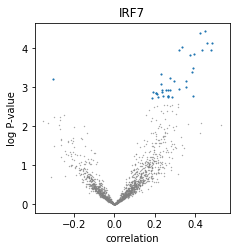

In [21]:
plt.figure(figsize=(3.5,3.5))
irf7_df = tf_volcano('IRF7')
plt.savefig(fig_path + 'tf_volcano_pbmc.png', bbox_to_inches='tight', dpi=300)

In [86]:
output_dfs['IRF7'].sort_values('logp', ascending=False).head(15)

gene_1    gene_2  corr_coef   corr_se  corr_pval  corr_fdr      logp
2353   IRF7  APOBEC3A   0.553805  0.062329   0.000009  0.008436  5.032199
268    IRF7     RSAD2   0.611229  0.072599   0.000011  0.008436  4.970978
1159   IRF7      LY6E   0.566870  0.079687   0.000011  0.008436  4.964964
1576   IRF7      OAS1   0.527661  0.082072   0.000014  0.008436  4.853462
1328   IRF7    IFITM3   0.491456  0.061726   0.000020  0.008890  4.709424
811    IRF7     PSMB9   0.491417  0.062719   0.000025  0.008890  4.599157
1615   IRF7    EPSTI1   0.628598  0.098516   0.000026  0.008890  4.587669
1802   IRF7     ISG20   0.564030  0.073622   0.000042  0.012728  4.373793
1020   IRF7      SAT1   0.304219  0.054794   0.000067  0.017978  4.172682
1107   IRF7      IDO1   0.433771  0.078747   0.000080  0.019203  4.098298
576    IRF7      LAP3   0.379627  0.070423   0.000137  0.027773  3.862182
884    IRF7    DYNLT1   0.451079  0.090072   0.000138  0.027773  3.858848
532    IRF7    PLSCR1   0.392645  0.073893   0.000154  0.028412  3.812927
1636   IRF7  TNFSF13B   0.496659  0.100587   0.000165  0.028412  3.782023
2023   IRF7    RNF213   0.552838  0.120069   0.000250  0.040106  3.602353

Text(0, 0.5, '')

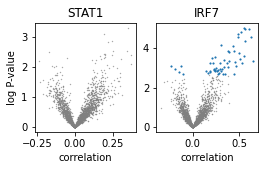

In [72]:
plt.figure(figsize=(4,2))
plt.subplot(1, 2, 1);
stat1_df = tf_volcano('STAT1')
plt.subplot(1, 2, 2)
irf7_df = tf_volcano('IRF7')
plt.ylabel(None)
# plt.savefig(fig_path + 'tf_volcano.png', bbox_to_inches='tight', dpi=300)

### Read the processed RNA data

Focus on the club and bc/club cells and type I interferons for now.

Encode the timestamps to integers.

In [5]:
adata = sc.read(data_path + 'HBEC_type_I_filtered_counts_deep.h5ad')

In [6]:
adata = adata[:, ~adata.var.index.str.startswith('MT-')].copy()
adata.obs['cell_type'] = adata.obs['cell_type'].apply(lambda x: x if x != 'basal/club' else 'bc')
adata.obs['cell_type'] = adata.obs['cell_type'].apply(lambda x: x if x != 'ionocyte/tuft' else 'ion-tuft')

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [7]:
adata.shape

(69958, 36588)

### Setup memento

In [8]:
def assign_q(batch):
    
    if batch == 0:
        return 0.387*0.25
    elif batch == 1:
        return 0.392*0.25
    elif batch == 2:
        return 0.436*0.25
    else:
        return 0.417*0.25

In [9]:
adata.obs['q'] = adata.obs['batch'].apply(assign_q)

In [10]:
memento.setup_memento(adata, q_column='q', trim_percent=0.1)

### Define TFs

In [11]:
filtered_tfs = """MAFG
SPI1
ZNF655
MAX
ATF4
ATF3
IRF2
IRF1
ARID5A
BACH1
YY1
HMGA1
IRF7
STAT1
NR1H2
XBP1
ETV6
MSC
ATF5
MAFB
FOS
CEBPB
BBX
STAT3
REL
JUN
CEBPD
DDIT3
NR3C1
TGIF1
ZNF267
NFE2L2
HIF1A
AHR
GTF2B
CREM
HBP1
RELB
TFEC
YBX1
ELF1
JUNB
NFKB1
IRF9
RBPJ
KLF6""".split()

### One sample test for all TFs

In [12]:
adata_ctrl = adata.copy()[
    adata.obs.cell_type.isin(['ciliated']) & \
    adata.obs.stim.isin(['control']), :].copy()
adata_ctrl.obs['group'] = 'A'

In [13]:
memento.create_groups(adata_ctrl, label_columns=['donor'])

In [14]:
memento.compute_1d_moments(adata_ctrl, min_perc_group=.9)

In [ ]:
for tf in filtered_tfs:
    
    if tf not in adata_ctrl.var.index.tolist():
        continue
    
    print('Control correlations for:', tf)
    
    memento.compute_2d_moments(adata_ctrl, list(itertools.product([tf], adata_ctrl.var.index.tolist())))
    
    memento.ht_2d_moments( 
        adata_ctrl, 
        formula_like='1',
        cov_column='Inter', 
        num_boot=10000, 
        verbose=1,
        num_cpus=14)
    
    adata_ctrl.write(data_path + 'control_corr/{}.h5ad'.format(tf))

### Get number of significantly correlated genes for each TF

In [17]:
tf_list = list(set(filtered_tfs) & set(adata_ctrl.var.index))

In [205]:
output_dfs = {}
for tf in tf_list:
    
    adata_tf = sc.read(data_path + 'control_corr/{}.h5ad'.format(tf))
    tf_result = memento.get_2d_ht_result(adata_tf)
    tf_result['corr_fdr'] = memento.util._fdrcorrect(tf_result['corr_pval'])
#     tf_result = tf_result.query('~gene_2.str.contains("RPS") & ~gene_2.str.contains("RPL")', engine='python')
    output_dfs[tf] = tf_result

### Volcano plots for STAT1, IRF7

In [242]:
def tf_volcano(tf):
    tf_result = output_dfs[tf]
    tf_result['logp'] = -np.log10(tf_result['corr_pval'])
    plt.scatter(tf_result['corr_coef'],tf_result['logp'], s=0.1, color='grey')
    plt.scatter(
        tf_result.query('corr_fdr < 0.1')['corr_coef'],
        tf_result.query('corr_fdr < 0.1')['logp'], s=1.2)
    plt.title(tf); plt.ylabel('log P-value'); plt.xlabel('correlation')
    
    return tf_result

<ipython-input-249-ea4b46031afd>:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fig_path + 'tf_volcano.png', bbox_to_inches='tight', dpi=300)


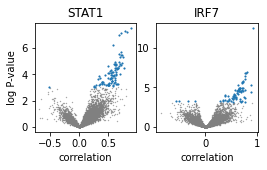

In [249]:
plt.figure(figsize=(4,2))
plt.subplot(1, 2, 1);
stat1_df = tf_volcano('STAT1')
plt.subplot(1, 2, 2)
irf7_df = tf_volcano('IRF7')
plt.ylabel(None)
plt.savefig(fig_path + 'tf_volcano.png', bbox_to_inches='tight', dpi=300)

In [250]:
irf7_df.sort_values('logp', ascending=False).head(20)

gene_1  gene_2  corr_coef   corr_se     corr_pval      corr_fdr  \
9583   IRF7     MX1   0.917227  0.060723  2.976680e-13  3.020735e-09   
6581   IRF7  EPSTI1   0.798548  0.083384  1.135444e-07  3.909930e-04   
2538   IRF7   HERC6   0.767718  0.104611  1.314186e-07  3.909930e-04   
5206   IRF7   IFIT1   0.781096  0.085885  1.541163e-07  3.909930e-04   
9582   IRF7     MX2   0.754638  0.087823  3.618774e-07  7.344663e-04   
4      IRF7   ISG15   0.751050  0.073313  7.585380e-07  1.282941e-03   
462    IRF7  IFI44L   0.712595  0.086325  1.781597e-06  2.283974e-03   
6406   IRF7    OAS1   0.697910  0.107587  1.917242e-06  2.283974e-03   
5388   IRF7  IFITM3   0.724710  0.074521  2.025598e-06  2.283974e-03   
203    IRF7    IFI6   0.697548  0.064869  2.521014e-06  2.558325e-03   
1044   IRF7   CMPK2   0.883081  0.105162  5.314339e-06  4.621453e-03   
7907   IRF7    XAF1   0.626352  0.111531  5.464864e-06  4.621453e-03   
5387   IRF7  IFITM1   0.727041  0.095512  1.056033e-05  7.851150e-03   
2063   IRF7   PARP9   0.663671  0.117626  1.155720e-05  7.851150e-03   
3296   IRF7   HLA-E   0.693031  0.113548  1.213448e-05  7.851150e-03   
6973   IRF7   IFI27   0.662757  0.071830  1.237864e-05  7.851150e-03   
1045   IRF7   RSAD2   0.653449  0.087840  1.352308e-05  8.072481e-03   
3353   IRF7   PSMB8   0.637104  0.124065  1.626366e-05  8.691562e-03   
2156   IRF7  PLSCR1   0.649356  0.097252  1.627313e-05  8.691562e-03   
8856   IRF7    BST2   0.636524  0.092574  1.830159e-05  9.286228e-03   

           logp  
9583  12.526268  
6581   6.944834  
2538   6.881343  
5206   6.812152  
9582   6.441439  
4      6.120023  
462    5.749191  
6406   5.717323  
5388   5.693447  
203    5.598425  
1044   5.274551  
7907   5.262421  
5387   4.976322  
2063   4.937147  
3296   4.915979  
6973   4.907327  
1045   4.868925  
3353   4.788782  
2156   4.788529  
8856   4.737511

In [247]:
stat1_df.sort_values('logp', ascending=False).head(20)

gene_1  gene_2  corr_coef   corr_se     corr_pval  corr_fdr      logp
6408  STAT1    OAS2   0.901655  0.077944  2.915865e-08  0.000167  7.535233
9582  STAT1     MX2   0.793511  0.092598  4.625450e-08  0.000167  7.334846
9583  STAT1     MX1   0.824872  0.060023  5.667139e-08  0.000167  7.246636
7907  STAT1    XAF1   0.727158  0.092976  6.571431e-08  0.000167  7.182340
3984  STAT1  SAMD9L   0.679193  0.097797  9.592675e-08  0.000195  7.018060
203   STAT1    IFI6   0.581431  0.067933  5.292960e-07  0.000895  6.276301
463   STAT1   IFI44   0.717163  0.096622  1.965733e-06  0.002850  5.706476
8155  STAT1   IFI35   0.682694  0.093186  3.041137e-06  0.003630  5.516964
6407  STAT1    OAS3   0.733548  0.101393  3.457292e-06  0.003630  5.461264
5387  STAT1  IFITM1   0.725632  0.080260  3.576697e-06  0.003630  5.446518
5206  STAT1   IFIT1   0.749353  0.068943  4.371160e-06  0.003849  5.359403
5447  STAT1  TRIM22   0.707532  0.114077  4.551418e-06  0.003849  5.341853
462   STAT1  IFI44L   0.686502  0.073355  1.090044e-05  0.008010  4.962556
2666  STAT1  DDX60L   0.611609  0.083676  1.105024e-05  0.008010  4.956628
5388  STAT1  IFITM3   0.740275  0.064660  1.304354e-05  0.008702  4.884605
4     STAT1   ISG15   0.712075  0.063270  1.484473e-05  0.008702  4.828428
1645  STAT1   SP110   0.621780  0.115562  1.523339e-05  0.008702  4.817203
8856  STAT1    BST2   0.599108  0.081451  1.543602e-05  0.008702  4.811465
2386  STAT1    LAP3   0.632030  0.080609  1.698410e-05  0.009071  4.769957
3850  STAT1  NT5C3A   0.726757  0.107678  1.871809e-05  0.009090  4.727738

In [224]:
tf_result = output_dfs['IRF7']
tf_result['logp'] = -np.log(tf_result['corr_pval'])

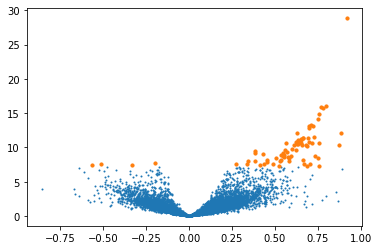

In [226]:
plt.scatter(tf_result['corr_coef'],tf_result['logp'], s=1)
plt.scatter(
    tf_result.query('corr_fdr < 0.1')['corr_coef'],
    tf_result.query('corr_fdr < 0.1')['logp'], s=10)

### TF-wide enrichment analysis

In [174]:
import gseapy as gp

In [184]:
enrichment_dfs = {}
for tf, df in output_dfs.items():
    
    sig_genes = df.query('corr_fdr < 0.05 & corr_coef > 0').gene_2.tolist()
    
    print(tf, len(sig_genes))
    
    if len(sig_genes) < 10:
        
        continue
    
    enr = gp.enrichr(
        gene_list=sig_genes,
        gene_sets=['Reactome_2016'],
        organism='Human', # don't forget to set organism to the one you desired! e.g. Yeast
        description='test_name',
        outdir='./gsea/',
        # no_plot=True,
        cutoff=0.5 # test dataset, use lower value from range(0,1)
    )
    
    enrichment_dfs[tf] = enr.results
    enrichment_dfs[tf]['term'] = enrichment_dfs[tf]['Term'].apply(lambda x : ' '.join(x.split(' ')[:-3]))
    enrichment_dfs[tf] = enrichment_dfs[tf][['term', 'Adjusted P-value']]

ETV6 0
CEBPD 212
ZNF655 0
ATF5 0
RBPJ 0
CREM 89
JUN 51
NFE2L2 1537
AHR 18
GTF2B 437
NR3C1 0
JUNB 8
ATF3 0
TGIF1 0
NFKB1 0
ATF4 0
FOS 300
HBP1 0
MAX 0
CEBPB 426
IRF1 0
NR1H2 0
BBX 29
BACH1 0
MAFG 0
ZNF267 0
IRF2 1
STAT3 1
RELB 0
XBP1 581
KLF6 12
YY1 624
YBX1 1755
IRF7 52
REL 0
ELF1 10
DDIT3 0
IRF9 166
HIF1A 40
STAT1 60
HMGA1 45


In [204]:
enrichment_dfs['YBX1'].head(15)

term  Adjusted P-value
0                      Respiratory electron transport      1.153592e-39
1   Respiratory electron transport, ATP synthesis ...      1.927268e-34
2   The citric acid (TCA) cycle and respiratory el...      4.176789e-34
3                                     Gene Expression      4.341471e-30
4                                       HIV Infection      3.237568e-27
5   APC/C:Cdc20 mediated degradation of mitotic pr...      2.807358e-23
6   Activation of APC/C and APC/C:Cdc20 mediated d...      5.010658e-23
7                                Complex I biogenesis      5.481349e-23
8     Processing of Capped Intron-Containing Pre-mRNA      1.465695e-22
9         AUF1 (hnRNP D0) binds and destabilizes mRNA      3.104418e-22
10                   Host Interactions of HIV factors      5.337711e-22
11  APC:Cdc20 mediated degradation of cell cycle p...      6.068534e-22
12  APC/C-mediated degradation of cell cycle proteins      1.596103e-21
13                   Regulation of mitotic cell cycle      1.596103e-21
14  Cdc20:Phospho-APC/C mediated degradation of Cy...      3.138940e-21

### ChIP-seq file links

In [123]:
chip_urls = {
    'CEBPD':'https://www.encodeproject.org/files/ENCFF929XBL/@@download/ENCFF929XBL.bed.gz',
    'CREM':'https://www.encodeproject.org/files/ENCFF021XJN/@@download/ENCFF021XJN.bed.gz',
    'JUN':'https://www.encodeproject.org/files/ENCFF329CUQ/@@download/ENCFF329CUQ.bed.gz',
    'NFE2L2':'https://www.encodeproject.org/files/ENCFF418TUX/@@download/ENCFF418TUX.bed.gz',
    'CEBPB':'https://www.encodeproject.org/files/ENCFF155LGO/@@download/ENCFF155LGO.bed.gz',
    'XBP1':'https://www.encodeproject.org/files/ENCFF472DLA/@@download/ENCFF472DLA.bed.gz',
    'STAT1':'https://www.encodeproject.org/files/ENCFF323QQU/@@download/ENCFF323QQU.bed.gz'
}

### Label genes as chip-seq hits

In [124]:
enc = encode.Encode('/home/ssm-user/Github/misc-seq/miscseq/GRCh38Genes.bed')

In [ ]:
for tf, df in output_dfs.items():
    
    if tf not in chip_urls:
        continue
    
    tf_bed = enc.get_encode_peaks_union([chip_urls[tf]])
    tf_genes = enc.get_peak_genes_bed(tf_bed, 0).query('distance == 0 & ~gene.str.contains("MT").values').gene.tolist()
    
    df['chip'] = df['gene_2'].apply(lambda x: x in tf_genes)
    


In [170]:
df_list = []
for tf, df in output_dfs.items():
    
    df['sig'] = (df['corr_fdr'] < 0.01) & (df['corr_coef'] > 0)
    df_list.append(df)

In [171]:
all_df = pd.concat(df_list)
tab = pd.crosstab(all_df['chip'], all_df['sig'])

In [172]:
chip_urls

{'CEBPD': 'https://www.encodeproject.org/files/ENCFF929XBL/@@download/ENCFF929XBL.bed.gz',
 'CREM': 'https://www.encodeproject.org/files/ENCFF021XJN/@@download/ENCFF021XJN.bed.gz',
 'JUN': 'https://www.encodeproject.org/files/ENCFF329CUQ/@@download/ENCFF329CUQ.bed.gz',
 'NFE2L2': 'https://www.encodeproject.org/files/ENCFF418TUX/@@download/ENCFF418TUX.bed.gz',
 'CEBPB': 'https://www.encodeproject.org/files/ENCFF155LGO/@@download/ENCFF155LGO.bed.gz',
 'XBP1': 'https://www.encodeproject.org/files/ENCFF472DLA/@@download/ENCFF472DLA.bed.gz',
 'STAT1': 'https://www.encodeproject.org/files/ENCFF323QQU/@@download/ENCFF323QQU.bed.gz'}

<AxesSubplot:xlabel='chip', ylabel='sig'>

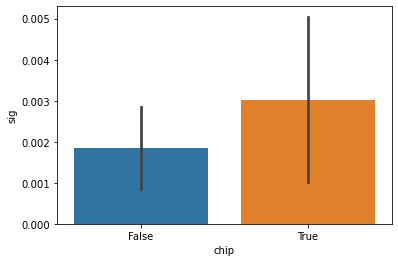

In [173]:
sns.barplot(x='chip', y='sig', data=all_df.query('gene_1 == "STAT1"'))

In [130]:
stats.chi2_contingency(tab.values)

(445.56040649511084,
 6.672744750886653e-99,
 1,
 array([[47697.82368018,  2131.17631982],
        [19154.17631982,   855.82368018]]))

In [104]:
output_dfs['STAT1'].crosstab('chip', 'sig')

AttributeError: 'DataFrame' object has no attribute 'crosstab'

In [99]:
tf_bed = enc.get_encode_peaks_union([chip_urls['CEBPD']])
tf_genes = enc.get_peak_genes_bed(tf_bed, 0).query('distance == 0 & ~gene.str.contains("MT").values').gene.tolist()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python

In [100]:
len(tf_genes)

3177

In [17]:
enc = encode.Encode('/home/ssm-user/Github/misc-seq/miscseq/GRCh38Genes.bed')

In [19]:
intersect_bed = stat1_bed.intersect(stat2_bed).sort()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)


In [20]:
isgf3_genes = enc.get_peak_genes_bed(intersect_bed, 0).query('distance == 0 & ~gene.str.contains("MT").values').gene.tolist()

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/subprocess.py:853: RuntimeWarning: line buffering (buffering=1) isn't supported in binary mode, the default buffer size will be used
  self.stderr = io.open(errread, 'rb', bufsize)
/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pybedtools/bedtool.py:3678: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file 

### Construct correlation matrix

In [85]:
mat = np.zeros((adata_ctrl.var.index.shape[0], len(tf_list)))*np.nan
corr_df = pd.DataFrame(mat, columns=tf_list, index=adata_ctrl.var.index)

for tf, df in output_dfs.items():
    
    sig = df.query('corr_fdr < 0.05 & corr_coef > 0')
    corr_df.loc[sig.gene_2.tolist(), tf] = sig.corr_coef.values
corr_df = corr_df.dropna(axis=1, how='all')
corr_df = corr_df.dropna(axis=0, how='all')

sig_genes = corr_df.index.tolist()
sig_tfs = corr_df.columns.tolist()

mat = np.zeros((adata_ctrl.var.index.shape[0], len(tf_list)))*np.nan
corr_df = pd.DataFrame(mat, columns=tf_list, index=adata_ctrl.var.index)

for tf, df in output_dfs.items():
    
    corr_df.loc[df.gene_2.tolist(), tf] = df.corr_coef.values
corr_df = corr_df.loc[sig_genes, sig_tfs].copy()

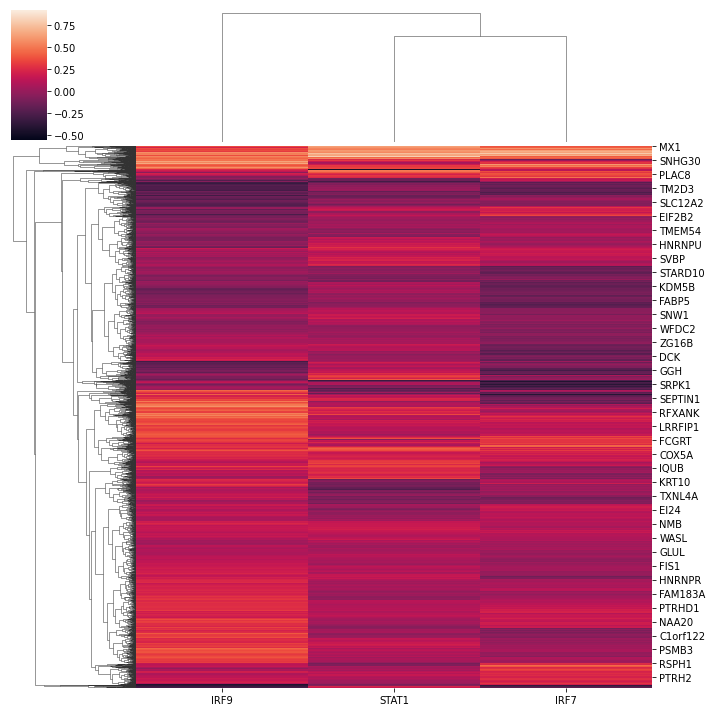

In [89]:
sns.clustermap(corr_df.fillna(0.0)[['STAT1', 'IRF7', 'IRF9']])

In [86]:
corr_df

CEBPD      CREM       JUN    NFE2L2       AHR     GTF2B  \
HES4        0.173999  0.280675  0.164231  0.145041  0.186672  0.021295   
ISG15       0.036301  0.108386 -0.054112  0.038329  0.072027  0.010346   
SDF4        0.215921 -0.036109  0.156059  0.103896 -0.025990  0.411588   
UBE2J2      0.122934  0.669866 -0.097923  0.324746  0.140324  0.413055   
AURKAIP1    0.050719  0.195922  0.139051  0.278535 -0.028331  0.647230   
...              ...       ...       ...       ...       ...       ...   
DKC1        0.045085  0.159975  0.261999  0.269150  0.132803  0.450085   
FUNDC2     -0.053677  0.520742  0.025836  0.233044 -0.301254  0.582204   
CMC4        0.114388  0.066136  0.228743  0.238986  0.051357 -0.187698   
VBP1        0.200067  0.064326  0.118249  0.389074  0.065275  0.142594   
AC007325.4 -0.108976 -0.183001  0.129230  0.044987 -0.008285  0.199198   

                JUNB       FOS     CEBPB       BBX  ...      XBP1      KLF6  \
HES4        0.211301  0.115798  0.180196  0.098594  ...  0.289849  0.162484   
ISG15       0.157664  0.018876  0.174906  0.022831  ...  0.018743  0.006748   
SDF4        0.173890  0.213615  0.430369  0.265995  ...  0.282389  0.352632   
UBE2J2     -0.059094  0.130050  0.667656  0.346123  ...  0.165818 -0.025471   
AURKAIP1   -0.052720  0.176900  0.259545  0.516088  ...  0.022268  0.138253   
...              ...       ...       ...       ...  ...       ...       ...   
DKC1        0.235194  0.298623  0.172440  0.094489  ...  0.320760  0.336580   
FUNDC2     -0.163695  0.126915  0.230056  0.197669  ...  0.048271 -0.082348   
CMC4        0.137987  0.009602  0.213707  0.010056  ... -0.033188 -0.066541   
VBP1        0.073276  0.137304  0.153439  0.144313  ...  0.151346  0.012300   
AC007325.4 -0.065559  0.396535 -0.009253  0.198041  ...  0.027636  0.119971   

                 YY1      YBX1      IRF7      ELF1      IRF9     HIF1A  \
HES4        0.234702  0.186489  0.082709 -0.023716  0.076103  0.304778   
ISG15      -0.018510 -0.108393  0.751050  0.264398  0.406563  0.120479   
SDF4        0.335271  0.522541  0.165520 -0.094333 -0.234666 -0.096445   
UBE2J2      0.476971  0.790029 -0.015169 -0.110922  0.166619  0.787093   
AURKAIP1    0.453393  0.668321  0.093844  0.179161  0.104666  0.441725   
...              ...       ...       ...       ...       ...       ...   
DKC1        0.200402  0.507826  0.093795  0.195890  0.082501  0.623737   
FUNDC2      0.233199  0.608644 -0.028603  0.334205  0.223555  0.133242   
CMC4        0.617488  0.385533  0.068484  0.319004  0.232610  0.017020   
VBP1        0.473461  0.556378 -0.106534  0.014355  0.007550  0.285696   
AC007325.4  0.326194  0.227016 -0.061835 -0.187990 -0.275651  0.461694   

               STAT1     HMGA1  
HES4        0.139460  0.331008  
ISG15       0.712075  0.133431  
SDF4       -0.142402  0.554139  
UBE2J2      0.123925  0.647944  
AURKAIP1    0.142373  0.389738  
...              ...       ...  
DKC1        0.220388  0.317876  
FUNDC2      0.078232  0.714147  
CMC4        0.041519  0.116239  
VBP1       -0.006590  0.401606  
AC007325.4 -0.069093  0.363616  

[2906 rows x 22 columns]

In [78]:
corr_df

CEBPD  CREM  JUN    NFE2L2  AHR    GTF2B  JUNB       FOS  CEBPB  \
HES4          NaN   NaN  NaN       NaN  NaN      NaN   NaN       NaN    NaN   
ISG15         NaN   NaN  NaN       NaN  NaN      NaN   NaN       NaN    NaN   
SDF4          NaN   NaN  NaN       NaN  NaN      NaN   NaN       NaN    NaN   
UBE2J2        NaN   NaN  NaN       NaN  NaN      NaN   NaN       NaN    NaN   
AURKAIP1      NaN   NaN  NaN  0.278535  NaN  0.64723   NaN       NaN    NaN   
...           ...   ...  ...       ...  ...      ...   ...       ...    ...   
DKC1          NaN   NaN  NaN       NaN  NaN      NaN   NaN       NaN    NaN   
FUNDC2        NaN   NaN  NaN       NaN  NaN      NaN   NaN       NaN    NaN   
CMC4          NaN   NaN  NaN       NaN  NaN      NaN   NaN       NaN    NaN   
VBP1          NaN   NaN  NaN  0.389074  NaN      NaN   NaN       NaN    NaN   
AC007325.4    NaN   NaN  NaN       NaN  NaN      NaN   NaN  0.396535    NaN   

                 BBX  ...      XBP1  KLF6       YY1      YBX1     IRF7  ELF1  \
HES4             NaN  ...  0.289849   NaN       NaN       NaN      NaN   NaN   
ISG15            NaN  ...       NaN   NaN       NaN       NaN  0.75105   NaN   
SDF4             NaN  ...       NaN   NaN       NaN  0.522541      NaN   NaN   
UBE2J2           NaN  ...       NaN   NaN       NaN  0.790029      NaN   NaN   
AURKAIP1    0.516088  ...       NaN   NaN  0.453393  0.668321      NaN   NaN   
...              ...  ...       ...   ...       ...       ...      ...   ...   
DKC1             NaN  ...       NaN   NaN       NaN  0.507826      NaN   NaN   
FUNDC2           NaN  ...       NaN   NaN       NaN  0.608644      NaN   NaN   
CMC4             NaN  ...       NaN   NaN  0.617488  0.385533      NaN   NaN   
VBP1             NaN  ...       NaN   NaN       NaN  0.556378      NaN   NaN   
AC007325.4       NaN  ...       NaN   NaN       NaN       NaN      NaN   NaN   

                IRF9  HIF1A     STAT1  HMGA1  
HES4             NaN    NaN       NaN    NaN  
ISG15       0.406563    NaN  0.712075    NaN  
SDF4             NaN    NaN       NaN    NaN  
UBE2J2           NaN    NaN       NaN    NaN  
AURKAIP1         NaN    NaN       NaN    NaN  
...              ...    ...       ...    ...  
DKC1             NaN    NaN       NaN    NaN  
FUNDC2           NaN    NaN       NaN    NaN  
CMC4             NaN    NaN       NaN    NaN  
VBP1             NaN    NaN       NaN    NaN  
AC007325.4       NaN    NaN       NaN    NaN  

[2906 rows x 22 columns]

In [73]:
np.isnan(corr_df.values).sum()

409696

In [74]:
adata_ctrl.var.index.shape[0]* len(tf_list)

416150

In [63]:
tf

'HMGA1'

In [62]:
sig.gene_2.tolist()

['YBX1',
 'F3',
 'OST4',
 'TMSB10',
 'PTMA',
 'CXCL8',
 'CXCL1',
 'NPM1',
 'HNRNPAB',
 'RACK1',
 'SOX4',
 'EEF1A1',
 'RAC1',
 'NDUFA4',
 'AGR2',
 'CAV2',
 'RDH10',
 'LYPD2',
 'POLR2L',
 'MDK',
 'FAU',
 'CFL1',
 'CTSC',
 'GAPDH',
 'TPI1',
 'MGST1',
 'NACA',
 'UBC',
 'TPT1',
 'SERF2',
 'HERPUD1',
 'COX4I1',
 'KRT19',
 'ACTG1',
 'SERPINB3',
 'CYB5A',
 'UBA52',
 'CXCL17',
 'KLK11',
 'CDC42EP5',
 'SLPI',
 'WFDC2',
 'RBX1',
 'TMSB4X',
 'SSR4']

In [61]:
corr_df

ETV6  CEBPD  ZNF655  ATF5  RBPJ  CREM  JUN  NFE2L2  AHR  GTF2B  \
LINC01409    NaN    NaN     NaN   NaN   NaN   NaN  NaN     NaN  NaN    NaN   
FAM41C       NaN    NaN     NaN   NaN   NaN   NaN  NaN     NaN  NaN    NaN   
NOC2L        NaN    NaN     NaN   NaN   NaN   NaN  NaN     NaN  NaN    NaN   
HES4         NaN    NaN     NaN   NaN   NaN   NaN  NaN     NaN  NaN    NaN   
ISG15        NaN    NaN     NaN   NaN   NaN   NaN  NaN     NaN  NaN    NaN   
...          ...    ...     ...   ...   ...   ...  ...     ...  ...    ...   
BRCC3        NaN    NaN     NaN   NaN   NaN   NaN  NaN     NaN  NaN    NaN   
VBP1         NaN    NaN     NaN   NaN   NaN   NaN  NaN     NaN  NaN    NaN   
TMLHE        NaN    NaN     NaN   NaN   NaN   NaN  NaN     NaN  NaN    NaN   
VAMP7        NaN    NaN     NaN   NaN   NaN   NaN  NaN     NaN  NaN    NaN   
AC007325.4   NaN    NaN     NaN   NaN   NaN   NaN  NaN     NaN  NaN    NaN   

            ...  YY1  YBX1  IRF7  REL  ELF1  DDIT3  IRF9  HIF1A  STAT1  HMGA1  
LINC01409   ...  NaN   NaN   NaN  NaN   NaN    NaN   NaN    NaN    NaN    NaN  
FAM41C      ...  NaN   NaN   NaN  NaN   NaN    NaN   NaN    NaN    NaN    NaN  
NOC2L       ...  NaN   NaN   NaN  NaN   NaN    NaN   NaN    NaN    NaN    NaN  
HES4        ...  NaN   NaN   NaN  NaN   NaN    NaN   NaN    NaN    NaN    NaN  
ISG15       ...  NaN   NaN   NaN  NaN   NaN    NaN   NaN    NaN    NaN    NaN  
...         ...  ...   ...   ...  ...   ...    ...   ...    ...    ...    ...  
BRCC3       ...  NaN   NaN   NaN  NaN   NaN    NaN   NaN    NaN    NaN    NaN  
VBP1        ...  NaN   NaN   NaN  NaN   NaN    NaN   NaN    NaN    NaN    NaN  
TMLHE       ...  NaN   NaN   NaN  NaN   NaN    NaN   NaN    NaN    NaN    NaN  
VAMP7       ...  NaN   NaN   NaN  NaN   NaN    NaN   NaN    NaN    NaN    NaN  
AC007325.4  ...  NaN   NaN   NaN  NaN   NaN    NaN   NaN    NaN    NaN    NaN  

[10150 rows x 41 columns]

### Compute DC genes for all TFs

In [14]:
filtered_tfs = """MAFG
SPI1
ZNF655
MAX
ATF4
ATF3
IRF2
IRF1
ARID5A
BACH1
YY1
HMGA1
IRF7
STAT1
NR1H2
XBP1
ETV6
MSC
ATF5
MAFB
FOS
CEBPB
BBX
STAT3
REL
JUN
CEBPD
DDIT3
NR3C1
TGIF1
ZNF267
NFE2L2
HIF1A
AHR
GTF2B
CREM
HBP1
RELB
TFEC
YBX1
ELF1
JUNB
NFKB1
IRF9
RBPJ
KLF6""".split()

In [16]:
def get_2d_ht(tf, ct, stim):
    
    adata_stim = adata.copy()[
        adata.obs.cell_type.isin(ct) & \
        adata.obs.time.isin(['0', '6']) & \
        adata.obs.stim.isin(['control', stim])].copy()
    time_converter={0:0, int('6'):1}
    adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

    memento.create_groups(adata_stim, label_columns=['time', 'donor'])
    memento.compute_1d_moments(adata_stim, min_perc_group=.9)
    moment_1d_df = memento.get_1d_moments(adata_stim, groupby='time')
    
    available_tfs = list(set(filtered_tfs) & set(moment_1d_df[0].gene))
    
    memento.compute_2d_moments(adata_stim, list(itertools.product(available_tfs, adata_stim.var.index)))
    
    moment_df = memento.get_2d_moments(adata_stim, groupby='time')
    
    candidates = moment_df.query('time_0 > 0.35 | time_6 > 0.35')
    candidates = list(zip(candidates['gene_1'], candidates['gene_2']))
    
    adata_stim = adata.copy()[
        adata.obs.cell_type.isin(ct) & \
        adata.obs.time.isin(['0', '6']) & \
        adata.obs.stim.isin(['control', stim])].copy()
    
    adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

    memento.create_groups(adata_stim, label_columns=['time_step', 'donor'])
    memento.compute_1d_moments(adata_stim, min_perc_group=.9)
    memento.compute_2d_moments(adata_stim, candidates)
    
    memento.ht_2d_moments( 
        adata_stim, 
        formula_like='1 + time_step',
        cov_column='time_step', 
        num_boot=10000, 
        verbose=1,
        num_cpus=13)
    
    
    ht_df = memento.get_2d_ht_result(adata_stim)
    
    return ht_df

In [17]:
alpha_ht_df = get_2d_ht('STAT1', ['ciliated'], 'alpha')

/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/main.py:594: RuntimeWarning: invalid value encountered in true_divide
[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  24 tasks      | elapsed:    5.1s
[Parallel(n_jobs=13)]: Done 174 tasks      | elapsed:   16.3s
[Parallel(n_jobs=13)]: Done 424 tasks      | elapsed:   33.8s
[Parallel(n_jobs=13)]: Done 774 tasks      | elapsed:   58.8s
[Parallel(n_jobs=13)]: Done 1224 tasks      | elapsed:  1.5min
[Parallel(n_jobs=13)]: Done 1774 tasks      | elapsed:  2.1min
[Parallel(n_jobs=13)]: Done 2424 tasks      | elapsed:  3.0min
[Parallel(n_jobs=13)]: Done 3174 tasks      | elapsed:  3.9min
[Parallel(n_jobs=13)]: Done 4024 tasks      | elapsed:  4.7min
[Parallel(n_jobs=13)]: Done 4974 tasks      | elapsed:  5.5min
[Parallel(n_jobs=13)]: Done 6024 tasks      | elapsed:  6.4min
[Parallel(n_jobs=13)]: Done 7174 tasks      | elapsed:  7.4min
[Parallel(n_job

In [ ]:
alpha_ht_df.to_csv(data_path + 'alpha_dc_result.csv', index=False)

In [ ]:
beta_ht_df = get_2d_ht('STAT1', ['ciliated'], 'beta')

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg/memento/main.py:594: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: 

In [ ]:
beta_ht_df.to_csv(data_path + 'beta_dc_result.csv', index=False)

In [ ]:
gamma_df = get_2d_ht('STAT1', ['ciliated'], 'gamma')

In [ ]:
gamma_df.to_csv(data_path + 'beta_dc_result.csv', index=False)

In [ ]:
lambda_df = get_2d_ht('STAT1', ['ciliated'], 'lambda')

### Compute correlations between ISGs

In [17]:
igs = ['ISG15', 'IFIT1', 'IFIT2', 'IFIT3', 'MX1', 'MX2', 'OASL']

In [19]:
# tf = 'STAT1'
# ct = ['ciliated']
# stim = 'beta'

def get_2d_moments_isg(tf, ct, stim):
    
    adata_stim = adata.copy()[
        adata.obs.cell_type.isin(ct) & \
        adata.obs.stim.isin(['control', stim])].copy()
    # time_converter={0:0, int(tp):1}
    # adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

    memento.create_groups(adata_stim, label_columns=['time', 'donor'])
    memento.compute_1d_moments(adata_stim, min_perc_group=.9)
    moment_1d_df = memento.get_1d_moments(adata_stim, groupby='time')

    memento.compute_2d_moments(adata_stim, list(itertools.combinations(igs, 2)))

    moment_df = memento.get_2d_moments(adata_stim, groupby='time')
    
    return moment_df

In [20]:
beta_isg_df = get_2d_moments_isg('STAT1', ['ciliated'], 'beta')

/data/home/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.7.egg/memento/estimator.py:100: RuntimeWarning: invalid value encountered in log


In [22]:
beta_isg_df[['gene_1', 'gene_2'] + ['time_' + str(i) for i in [0, 3, 6, 9, 24, 48]]]

gene_1 gene_2    time_0    time_3    time_6    time_9   time_24   time_48
0   ISG15  IFIT1  0.912525  0.859475  0.860717  0.894880  0.849657  0.824642
1   ISG15  IFIT2  0.709213  0.766188  0.748801  0.839606  0.855540  0.743067
2   ISG15  IFIT3  0.738290  0.768141  0.814666  0.828783  0.823922  0.729833
3   ISG15    MX1  0.819765  0.814883  0.833459  0.875096  0.857120  0.787441
4   ISG15    MX2  0.731378  0.700568  0.671598  0.814559  0.801095  0.747115
5   ISG15   OASL  0.702671  0.723763  0.680118  0.818876  0.741394  0.795438
6   IFIT1  IFIT2  0.627455  0.830298  0.807820  0.860115  0.852993  0.865924
7   IFIT1  IFIT3  0.802160  0.856047  0.889002  0.881489  0.884011  0.875954
8   IFIT1    MX1  0.970948  0.821224  0.825487  0.831096  0.733519  0.771687
9   IFIT1    MX2  0.690637  0.677439  0.632088  0.792340  0.712742  0.747235
10  IFIT1   OASL  0.628502  0.752242  0.695485  0.804211  0.768171  0.826975
11  IFIT2  IFIT3  0.696193  0.837954  0.829943  0.836865  0.830478  0.862385
12  IFIT2    MX1  0.515990  0.698023  0.703704  0.812500  0.746478  0.668681
13  IFIT2    MX2  0.513598  0.652613  0.645119  0.779230  0.759103  0.751041
14  IFIT2   OASL  0.795051  0.748258  0.731663  0.789200  0.774611  0.736705
15  IFIT3    MX1  0.734473  0.763209  0.800982  0.858110  0.766818  0.706254
16  IFIT3    MX2  0.608246  0.640650  0.621902  0.759888  0.721426  0.706908
17  IFIT3   OASL  0.860601  0.779452  0.727524  0.749129  0.743811  0.757626
18    MX1    MX2  0.773256  0.772469  0.758207  0.873694  0.813110  0.811610
19    MX1   OASL  0.564422  0.660583  0.565555  0.714459  0.625665  0.796824
20    MX2   OASL  0.586160  0.629847  0.505000  0.756339  0.654254  0.744816

### Compute correlations for STAT1

In [15]:
tf = 'STAT1'
ct = ['ciliated']
stim = 'beta'

def get_2d_moments(tf, ct, stim):
    
    adata_stim = adata.copy()[
        adata.obs.cell_type.isin(ct) & \
        adata.obs.stim.isin(['control', stim])].copy()
    # time_converter={0:0, int(tp):1}
    # adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

    memento.create_groups(adata_stim, label_columns=['time', 'donor'])
    memento.compute_1d_moments(adata_stim, min_perc_group=.9)
    moment_1d_df = memento.get_1d_moments(adata_stim, groupby='time')

    memento.compute_2d_moments(adata_stim, list(itertools.product([tf], adata_stim.var.index)))

    moment_df = memento.get_2d_moments(adata_stim, groupby='time')
    
#     memento.ht_2d_moments( 
#         adata_stim, 
#         formula_like='1 + time_step',
#         cov_column='time_step', 
#         num_boot=10000, 
#         verbose=1,
#         num_cpus=13)
    
#     ht_df = memento.get_2d_ht_result(adata_stim)
    
    return moment_df

In [16]:
beta_df = get_2d_moments('STAT1', ['ciliated'], 'beta')
alpha_df = get_2d_moments('STAT1', ['ciliated'], 'alpha')
gamma_df = get_2d_moments('STAT1', ['ciliated'], 'gamma')
lambda_df = get_2d_moments('STAT1', ['ciliated'], 'lambda')

beta_df['stim'] = 'beta'
alpha_df['stim'] = 'alpha'
df = pd.concat([alpha_df, beta_df])

/data/home/Github/scrna-parameter-estimation/dist/memento-0.0.4-py3.7.egg/memento/estimator.py:100: RuntimeWarning: invalid value encountered in log
/data/home/Github/scrna-parameter-estimation/dist/memento-0.0.4-py3.7.egg/memento/main.py:578: RuntimeWarning: invalid value encountered in true_divide
/data/home/anaconda3/envs/single_cell/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [19]:
beta_df['isgf3'] = beta_df.gene_2.apply(lambda x: 'in TSS' if x in isgf3_genes else 'rest')

### ISGF3 correlations for alpha/beta interferon

In [32]:
beta_df.head(5)

gene_1     gene_2    time_9    time_3    time_0    time_6   time_48  \
0  STAT1  LINC01409 -0.175255  0.022280  0.389398  0.091183 -0.208910   
1  STAT1      NOC2L -0.070694  0.070377  0.127526  0.105913 -0.018320   
2  STAT1       HES4  0.433971  0.389929  0.139460  0.436864  0.531960   
3  STAT1      ISG15  0.756565  0.751469  0.712075  0.702480  0.766635   
4  STAT1       AGRN  0.447522  0.238193  0.227282  0.222979  0.311116   

    time_24  stim   isgf3  
0 -0.145140  beta    rest  
1 -0.201853  beta    rest  
2  0.601891  beta    rest  
3  0.835480  beta  in TSS  
4  0.186166  beta    rest

In [33]:
alpha_df.head(5)

gene_1     gene_2    time_9    time_3    time_0   time_48    time_6  \
0  STAT1  LINC01409  0.058433  0.172438  0.389398  0.078051  0.003680   
1  STAT1      NOC2L -0.029808  0.189881  0.127526  0.249579  0.348690   
2  STAT1       HES4  0.438277  0.379277  0.139460  0.363275  0.388632   
3  STAT1      ISG15  0.695766  0.733140  0.712075  0.699458  0.661231   
4  STAT1       AGRN  0.204388  0.225468  0.227282  0.297670  0.132081   

    time_24   stim  
0  0.365823  alpha  
1 -0.052135  alpha  
2  0.525524  alpha  
3  0.768229  alpha  
4  0.174836  alpha

In [28]:
a =  beta_df[['gene_2', 'time_0']].rename(columns={'gene_2':'gene', 'time_0':'corr'})
b =  beta_df[['gene_2', 'time_6']].rename(columns={'gene_2':'gene', 'time_6':'corr'})

a['time'] = 'ctrl'
b['time'] = 'stim'
beta_long_df = pd.concat([a, b])

beta_long_df['isgf3'] = beta_long_df.gene.apply(lambda x: 'in TSS' if x in isgf3_genes else 'rest')

In [29]:
a =  alpha_df[['gene_2', 'time_0']].rename(columns={'gene_2':'gene', 'time_0':'corr'})
b =  alpha_df[['gene_2', 'time_6']].rename(columns={'gene_2':'gene', 'time_6':'corr'})

a['time'] = 'ctrl'
b['time'] = 'stim'
alpha_long_df = pd.concat([a, b])

alpha_long_df['isgf3'] = alpha_long_df.gene.apply(lambda x: 'in TSS' if x in isgf3_genes else 'rest')

In [22]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)


In [42]:
pbmc_data_path = '/data_volume/parameter_estimation/'
pbmc_long_df = pd.read_csv(pbmc_data_path + 'stat1_corrs.csv').rename(columns={'stim':'time'})

In [43]:
pbmc_long_df.head(5)

gene      corr  time  isgf3  high_exp
0     ISG15  0.057578  ctrl  ISGF3      True
1  AURKAIP1  0.128053  ctrl   rest      True
2    MRPL20 -0.059311  ctrl   rest      True
3     SSU72 -0.078957  ctrl  ISGF3      True
4      GNB1 -0.000787  ctrl   rest      True

In [45]:
ab_joined = alpha_long_df.merge(beta_long_df, on=['gene', 'time'], suffixes=('_alpha', '_beta'))
pbmc_joined = beta_long_df.merge(pbmc_long_df, on=['gene', 'time'], suffixes=('_beta', '_pbmc'))

In [74]:
pbmc_joined.head(5)

gene  corr_beta  time isgf3_beta  corr_pbmc isgf3_pbmc  high_exp
0     ISG15   0.712075  ctrl     in TSS   0.057578      ISGF3      True
1  AURKAIP1   0.142373  ctrl       rest   0.128053       rest      True
2    MRPL20   0.047689  ctrl       rest  -0.059311       rest      True
3     SSU72  -0.026395  ctrl       rest  -0.078957      ISGF3      True
4      GNB1   0.095139  ctrl       rest  -0.000787       rest      True

In [70]:
stats.pearsonr(pbmc_joined.query('time == "stim"').corr_beta, pbmc_joined.query('time == "stim"').corr_pbmc)

(0.1712953648060725, 2.201513571182445e-10)

In [77]:
stats.pearsonr(ab_joined.query('time == "stim"').corr_beta, ab_joined.query('time == "stim"').corr_alpha)

(0.6929252536906498, 0.0)

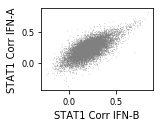

In [69]:
plt.figure(figsize=(2, 1.5))
plt.scatter(ab_joined.query('time == "stim"').corr_beta, ab_joined.query('time == "stim"').corr_alpha, s=0.01, color='grey')
plt.ylabel('STAT1 Corr IFN-A'); plt.xlabel('STAT1 Corr IFN-B')
plt.savefig(fig_path + 'stat1_corr_ab.png', bbox_inches='tight', dpi=300)


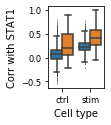

In [39]:
plt.figure(figsize=(1, 1.5))
sns.boxplot(x='time', y='corr', hue='isgf3', data=alpha_long_df, fliersize=0.1)

plt.xlabel('Cell type'); plt.ylabel('Corr with STAT1');
plt.legend([], frameon=False)
# plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.4), frameon=False)
# plt.ylim(-.8, 0.6)
plt.savefig(fig_path + 'isgf3_vs_rest_alpha.pdf', bbox_inches='tight')



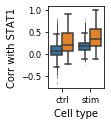

In [40]:
plt.figure(figsize=(1, 1.5))
sns.boxplot(x='time', y='corr', hue='isgf3', data=beta_long_df, fliersize=0.1)

plt.xlabel('Cell type'); plt.ylabel('Corr with STAT1');
plt.legend([], frameon=False)

# plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.15))
# plt.ylim(-.8, 0.6)
plt.savefig(fig_path + 'isgf3_vs_rest_beta.pdf', bbox_inches='tight')



In [21]:
beta_df.head(2)

gene_1     gene_2    time_9    time_3    time_0    time_6  time_48  \
0  STAT1  LINC01409 -0.175255  0.022280  0.389398  0.091183 -0.20891   
1  STAT1      NOC2L -0.070694  0.070377  0.127526  0.105913 -0.01832   

    time_24  stim  
0 -0.145140  beta  
1 -0.201853  beta

In [ ]:
plt.figure(figsize=(2.5, 3))
sns.boxplot(x='ct', y='dv_coef', hue='isgf3', data=alpha_df.sort_values('isgf3'), palette='Set2')

plt.xlabel('Cell type'); plt.ylabel('Change in variability');
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.15))
# plt.ylim(-.8, 0.6)
# plt.savefig(fig_path + 'isgf3_vs_rest.pdf', bbox_inches='tight')



(-0.75, 1)

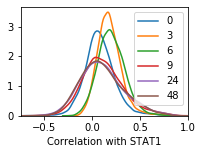

In [23]:
plt.figure(figsize=(3, 2))
for tp in ['0', '3', '6', '9', '24', '48']:#['0', '3', '6', '9', '24', '48']:
    sns.distplot(beta_df['time_' + tp], hist=False, label=tp)
# plt.legend(, frameon=False)
plt.xlabel('Correlation with STAT1')
plt.xlim(-0.75, 1)

In [81]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

In [100]:
def ridgeplot(df):

    colors = ['#0000ff', '#3300cc', '#660099', '#990066', '#cc0033', '#ff0000']

    gs = grid_spec.GridSpec(6,1)
    fig = plt.figure(figsize=(3,2))

    i = 0

    ax_objs = []
    for i, tp in enumerate(['0', '3', '6', '9', '24', '48'][::-1]):
        x = df['time_' + tp].values
        x = x[np.isfinite(x)]
        x_d = np.linspace(-0.7,1, 1000)

        kde = KernelDensity(bandwidth=0.025, kernel='gaussian')
        kde.fit(x[:, None])

        logprob = kde.score_samples(x_d[:, None])

        # creating new axes object
        ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

        # plotting the distribution
        ax_objs[-1].plot(x_d, np.exp(logprob),lw=3, color=colors[i])
    #     ax_objs[-1].fill_between(x_d, np.exp(logprob), alpha=1,color=colors[i])
    
        if i == 0:
            mode_corr = x_d[np.argmax(logprob)]
#             ax_objs[-1].plot([mode_corr, mode_corr], [0, 10])

        # setting uniform x and y lims
        ax_objs[-1].set_xlim(-0.4,0.7)
    #     ax_objs[-1].set_ylim(0,2.5)

        # make background transparent
        rect = ax_objs[-1].patch
        rect.set_alpha(0)

        # remove borders, axis ticks, and labels
        ax_objs[-1].set_yticklabels([])

        if i == 6-1:
            ax_objs[-1].set_xlabel("Correlation", fontsize=10,fontweight="bold")
        else:
            ax_objs[-1].set_xticklabels([])
            ax_objs[-1].set_xticks([])

        spines = ["top","right","left","bottom"]
        for s in spines:
            ax_objs[-1].spines[s].set_visible(False)
    #     
        ax_objs[-1].set_yticks([])
    #     adj_country = country.replace(" ","\n")
        ax_objs[-1].text(-0.5,0,tp,fontweight="bold",fontsize=14,ha="right")
        i += 1

    gs.update(hspace=-0.7)
    
#     plt.plot([mode_corr, mode_corr], [0, 10])

    # fig.text(0.07,0.85,"Distribution of Aptitude Test Results from 18 – 24 year-olds",fontsize=20)

    plt.tight_layout()
    plt.show()
    
    return fig


/data/home/anaconda3/envs/single_cell/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


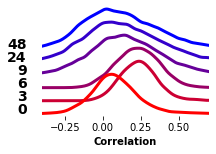

In [102]:
fig = ridgeplot(alpha_df)
fig.savefig(fig_path + 'corr_hist_alpha.pdf', bbox_inches='tight')

/data/home/anaconda3/envs/single_cell/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


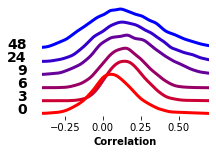

In [103]:
fig = ridgeplot(gamma_df)
fig.savefig(fig_path + 'corr_hist_gamma.pdf', bbox_inches='tight')

/data/home/anaconda3/envs/single_cell/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


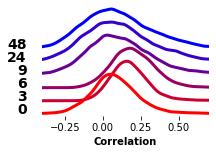

In [104]:
fig = ridgeplot(beta_df)
fig.savefig(fig_path + 'corr_hist_beta.pdf', bbox_inches='tight')

/data/home/anaconda3/envs/single_cell/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


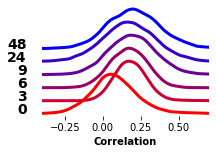

In [105]:
fig = ridgeplot(lambda_df)
fig.savefig(fig_path + 'corr_hist_lambda.pdf', bbox_inches='tight')

### TF ordering at timepoint 3

In [66]:
filtered_tfs = """MAFG
SPI1
ZNF655
MAX
ATF4
ATF3
IRF2
IRF1
ARID5A
BACH1
YY1
HMGA1
IRF7
STAT1
NR1H2
XBP1
ETV6
MSC
ATF5
MAFB
FOS
CEBPB
BBX
STAT3
REL
JUN
CEBPD
DDIT3
NR3C1
TGIF1
ZNF267
NFE2L2
HIF1A
AHR
GTF2B
CREM
HBP1
RELB
TFEC
YBX1
ELF1
JUNB
NFKB1
IRF9
RBPJ
KLF6""".split()

In [20]:
whitelist = beta_df.gene_2.tolist()

In [ ]:
tf_df_list = []
for tf in filtered_tfs:
    
    if tf not in whitelist:
        continue
    
    df = get_2d_moments(tf, ['ciliated'], 'beta')
    diff = (df['time_3'] - df['time_0']).mean()
    tf_df_list.append((tf, diff))
    del df
    
    print(tf)
#     break

tf_df_beta = pd.DataFrame(tf_df_list, columns=['tf', 'diff']).sort_values('diff', ascending=False)
tf_df_beta['tf'] = tf_df_beta['tf'].astype('category')
tf_order = tf_df_beta.sort_values('diff', ascending=False).tf.tolist()
tf_df_beta['tf'].cat.set_categories(tf_order, inplace=True)

In [97]:
tf_df_list = []
for tf in filtered_tfs:
    
    if tf not in whitelist:
        continue
    
    df = get_2d_moments(tf, ['ciliated'], 'alpha')
    diff = (df['time_3'] - df['time_0']).mean()
    tf_df_list.append((tf, diff))
    del df
    
    print(tf)
#     break

tf_df_alpha = pd.DataFrame(tf_df_list, columns=['tf', 'diff']).sort_values('diff', ascending=False)
tf_df_alpha['tf'] = tf_df_alpha['tf'].astype('category')
tf_order = tf_df_alpha.sort_values('diff', ascending=False).tf.tolist()
tf_df_alpha['tf'].cat.set_categories(tf_order, inplace=True)

/data/home/Github/scrna-parameter-estimation/dist/memento-0.0.4-py3.7.egg/memento/main.py:578: RuntimeWarning: invalid value encountered in true_divide
  groupby_corr[key] /= groupby_corr_count[key]


MAFG
ZNF655
MAX
ATF4
ATF3
IRF2
IRF1
BACH1
YY1
HMGA1
IRF7
STAT1
NR1H2
XBP1
ETV6
ATF5
FOS
CEBPB
BBX
STAT3
REL
JUN
CEBPD
DDIT3
NR3C1
TGIF1
ZNF267
NFE2L2
HIF1A
AHR
GTF2B
CREM
HBP1
RELB
YBX1
ELF1
JUNB
NFKB1
IRF9
RBPJ
KLF6


In [98]:
tf_df_list = []
for tf in filtered_tfs:
    
    if tf not in whitelist:
        continue
    
    df = get_2d_moments(tf, ['ciliated'], 'gamma')
    diff = (df['time_3'] - df['time_0']).mean()
    tf_df_list.append((tf, diff))
    del df
    
    print(tf)
#     break

tf_df_gamma = pd.DataFrame(tf_df_list, columns=['tf', 'diff']).sort_values('diff', ascending=False)
tf_df_gamma['tf'] = tf_df_gamma['tf'].astype('category')
tf_order = tf_df_gamma.sort_values('diff', ascending=False).tf.tolist()
tf_df_gamma['tf'].cat.set_categories(tf_order, inplace=True)

MAFG
ZNF655
MAX
ATF4
ATF3
IRF2
IRF1
BACH1
YY1
HMGA1
IRF7
STAT1
NR1H2
XBP1
ETV6
ATF5
FOS
CEBPB
BBX
STAT3
REL
JUN
CEBPD
DDIT3
NR3C1
TGIF1
ZNF267
NFE2L2
HIF1A
AHR
GTF2B
CREM
HBP1
RELB
YBX1
ELF1
JUNB
NFKB1
IRF9
RBPJ
KLF6


In [28]:
pbmc_data_path = '/data_volume/parameter_estimation/'
pbmc_tf_df = pd.read_csv(pbmc_data_path + 'tf_corr_changes.csv')

In [32]:
pbmc_tf_df = pbmc_tf_df.groupby('tf').diff.mean().reset_index()

In [33]:
joined = tf_df_beta.merge(tf_df_alpha, on='tf', suffixes=('_beta', '_alpha'))
joined_pbmc = tf_df_beta.merge(pbmc_tf_df, on='tf', suffixes=('_beta', '_pbmc'))
joined_pbmc = tf_df_beta.merge(pbmc_tf_df, on='tf', suffixes=('_beta', '_pbmc'))

In [29]:
joined.head(5)

tf  diff_beta  diff_alpha
0  STAT1   0.099344    0.156776
1   IRF9   0.099322    0.125458
2   IRF7   0.086175    0.127605
3  TGIF1   0.071129    0.091961
4  BACH1   0.063072    0.085814

In [101]:
stats.pearsonr(joined['diff_beta'], joined['diff_alpha'])

(0.8844643874489025, 1.750514636467869e-14)

In [100]:
stats.pearsonr(joined_pbmc['diff_beta'], joined_pbmc['diff_pbmc'])

(0.294557632916126, 0.07262447260476375)

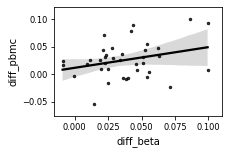

In [99]:
plt.figure(figsize=(3,2))
sns.regplot(joined_pbmc['diff_beta'], joined_pbmc['diff_pbmc'], scatter_kws={'s':6, 'color':'k'}, line_kws={'color':'k'})
plt.xlim(-0.015, 0.11); 
# plt.xlabel('Corr shift IFN-B'); plt.ylabel('Corr shift IFN-A')
# plt.savefig(fig_path + 'corr_shift_AB.pdf', bbox_inches='tight')


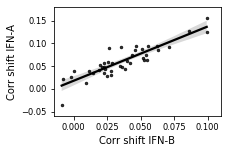

In [59]:
plt.figure(figsize=(3,2))
sns.regplot(joined['diff_beta'], joined['diff_alpha'], scatter_kws={'s':6, 'color':'k'}, line_kws={'color':'k'})
plt.xlim(-0.015, 0.11); 
plt.xlabel('Corr shift IFN-B'); plt.ylabel('Corr shift IFN-A')
plt.savefig(fig_path + 'corr_shift_AB.pdf', bbox_inches='tight')


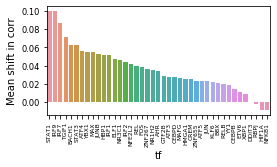

In [31]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'6',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)

plt.figure(figsize=(4, 2))

sns.barplot(x='tf', y='diff', data=tf_df, errwidth=2)
plt.xticks(rotation=90);
plt.ylabel('Mean shift in corr')

plt.savefig(fig_path + 'tf_effect_sizes.pdf', bbox_inches='tight')


### Look for STAT1 DC genes

In [12]:
cts = [['ciliated'], ['bc', 'basal']]
tps = ['3', '6', '9', '24', '48']
stims = ['alpha', 'beta', 'gamma', 'lambda']

In [13]:
import os

In [14]:
done_files = os.listdir('/data_volume/ifn_hbec/tf_test/')

In [14]:
tf = 'STAT1'

cts = [['ciliated']]
tps = ['3']
stims = ['beta']


for ct in cts:
    for tp in tps:
        for stim in stims:
            
            fname = '{}_{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp, tf)
            if fname in done_files:
                continue
                            
            print('starting', ct, tp, stim)

            adata_stim = adata.copy()[
                adata.obs.cell_type.isin(ct) & \
                adata.obs.stim.isin(['control', stim]) & \
                adata.obs.time.isin(['0',tp]), :].copy()
            time_converter={0:0, int(tp):1}
            adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

            memento.create_groups(adata_stim, label_columns=['time_step', 'donor'])
            memento.compute_1d_moments(adata_stim, min_perc_group=.9)
            memento.compute_2d_moments(adata_stim, list(itertools.product([tf], adata_stim.var.index)))

            moment_df = memento.get_2d_moments(adata_stim, groupby='time_step')
            moment_df.to_csv('/data_volume/ifn_hbec/coex_test/moments_{}_{}_{}_{}.csv'.format('-'.join(ct), stim, tp, tf), index=False)
            gene_list = adata_stim.var.index.tolist()#moment_df[(moment_df['time_step_0'] > 0.35) | (moment_df['time_step_1'] > 0.35)].gene_2.tolist()

            memento.compute_2d_moments(adata_stim, list(itertools.product([tf], gene_list)))

            memento.ht_2d_moments( 
                adata_stim, 
                formula_like='1 + time_step',
                cov_column='time_step', 
                num_boot=10000, 
                verbose=1,
                num_cpus=13)

            if 'mv_regressor' in adata_stim.uns['memento']:
                del adata_stim.uns['memento']['mv_regressor']
            adata_stim.write('/data_volume/ifn_hbec/tf_test/{}_{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp, tf))

### What are the STAT1 DC genes?

In [57]:
stim = 'beta'
tp = '3'
ct = ['ciliated']

fname = '/data_volume/ifn_hbec/tf_test/{}_{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp, tf)
adata_result = sc.read(fname)

In [105]:

fname = '/data_volume/ifn_hbec/tf_test/{}_{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp, tf)
adata_result = sc.read(fname)

moments = memento.get_2d_moments(adata_result, groupby='time')
res_df = memento.get_2d_ht_result(adata_result)
# rel_res_df = memento.get_2d_ht_result(adata_stim)

In [106]:
moments.query('gene_2.str.startswith("HLA-")', engine='python')

gene_1 gene_2    time_3    time_0
324  STAT1  HLA-F  0.516336  0.303196
325  STAT1  HLA-A  0.435438  0.184255
326  STAT1  HLA-E  0.626379  0.415575
327  STAT1  HLA-C  0.530611  0.319793
328  STAT1  HLA-B  0.437998  0.201227

In [80]:
wired_pairs = moments.query('time_0 > 0.25 | time_{} > 0.25'.format(tp))

In [81]:
filtered_res_df = df.merge(wired_pairs, on=['gene_1', 'gene_2'])
filtered_res_df['corr_fdr'] = memento.util._fdrcorrect(filtered_res_df['corr_pval'])

In [ ]:
for g in filtered_res_df.query('corr_fdr < 0.1 & corr_coef > 0').gene_2.tolist():
    print(g)

In [52]:
filtered_res_df.shape

(869, 7)

In [53]:
res_df.shape

(891, 5)

### Re-run the STAT1 anaylsis for subset

In [15]:
tf = 'STAT1'

cts = [['ciliated']]
tps = ['3', '6', '9', '24', '48']
stims = ['alpha', 'beta', 'gamma', 'lambda']


for ct in cts:
    for tp in tps:
        for stim in stims:
            
#             fname = '{}_{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp, tf)
#             if fname in done_files:
#                 continue
                            
            print('starting', ct, tp, stim)

            adata_stim = adata.copy()[
                adata.obs.cell_type.isin(ct) & \
                adata.obs.stim.isin(['control', stim]) & \
                adata.obs.time.isin(['0',tp]), :].copy()
            time_converter={0:0, int(tp):1}
            adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

            memento.create_groups(adata_stim, label_columns=['time_step', 'donor'])
            memento.compute_1d_moments(adata_stim, min_perc_group=.9)
            
            gene_list = adata_stim.var.index.tolist()
            
            memento.compute_2d_moments(adata_stim, list(itertools.product([tf], adata_stim.var.index)))

            moment_df = memento.get_2d_moments(adata_stim, groupby='time_step')
            moment_df.to_csv('/data_volume/ifn_hbec/tf_test/moments_{}_{}_{}_{}.csv'.format('-'.join(ct), stim, tp, tf), index=False)
#             gene_list = adata_stim.var.index.tolist()#moment_df[(moment_df['time_step_0'] > 0.35) | (moment_df['time_step_1'] > 0.35)].gene_2.tolist()

#             memento.compute_2d_moments(adata_stim, list(itertools.product([tf], gene_list)))

#             memento.ht_2d_moments( 
#                 adata_stim, 
#                 formula_like='1 + time_step',
#                 cov_column='time_step', 
#                 num_boot=10000, 
#                 verbose=1,
#                 num_cpus=13)

#             if 'mv_regressor' in adata_stim.uns['memento']:
#                 del adata_stim.uns['memento']['mv_regressor']
#             adata_stim.write('/data_volume/ifn_hbec/tf_test/{}_{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp, tf))

starting ['ciliated'] 3 alpha
starting ['ciliated'] 3 beta
starting ['ciliated'] 3 gamma


/data/home/Github/scrna-parameter-estimation/dist/memento-0.0.4-py3.7.egg/memento/main.py:578: RuntimeWarning: invalid value encountered in true_divide


starting ['ciliated'] 3 lambda
starting ['ciliated'] 6 alpha
starting ['ciliated'] 6 beta
starting ['ciliated'] 6 gamma
starting ['ciliated'] 6 lambda
starting ['ciliated'] 9 alpha
starting ['ciliated'] 9 beta
starting ['ciliated'] 9 gamma
starting ['ciliated'] 9 lambda
starting ['ciliated'] 24 alpha
starting ['ciliated'] 24 beta
starting ['ciliated'] 24 gamma
starting ['ciliated'] 24 lambda
starting ['ciliated'] 48 alpha
starting ['ciliated'] 48 beta
starting ['ciliated'] 48 gamma
starting ['ciliated'] 48 lambda


### Compile STAT1 DC and correlation status

In [140]:
stim = 'gamma'
ct = ['ciliated']
tf = 'STAT1'

In [141]:

for tp in ['3', '6', '9', '24', '48']:
    
    print(tp)

    fname = '/data_volume/ifn_hbec/tf_test/{}_{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp, tf)
    adata_result = sc.read(fname)
    
#     moments = memento.get_2d_moments(adata_result, groupby='time_step').rename(columns={'time_step_0':'time_0', 'time_step_1':'time_'+tp})
    moments = pd.read_csv('/data_volume/ifn_hbec/tf_test/moments_{}_{}_{}_{}.csv'.format('-'.join(ct), stim, tp, tf)).rename(columns={'time_step_0':'time_0', 'time_step_1':'time_'+tp})
    res_df = memento.get_2d_ht_result(adata_result)\
        .rename(columns={
            'corr_coef':'corr_coef' + '_' + tp,
            'corr_pval':'corr_pval' + '_' + tp})
    
    if tp == '3':

        pv_df = res_df[['gene_1', 'gene_2', 'corr_pval' + '_' + tp]].copy()
        coef_df = res_df[['gene_1', 'gene_2', 'corr_coef' + '_' + tp]].copy()
        moment_df = moments[['gene_1', 'gene_2', 'time_0', 'time_3']].copy()
        
    else:
        
        pv_df = pv_df.merge(res_df[['gene_1', 'gene_2', 'corr_pval' + '_' + tp]].copy(), on=['gene_1', 'gene_2'], how='outer')
        coef_df = coef_df.merge(res_df[['gene_1', 'gene_2', 'corr_coef' + '_' + tp]].copy(), on=['gene_1', 'gene_2'], how='outer')
        moment_df = moment_df.merge(moments[['gene_1', 'gene_2', 'time_{}'.format(tp)]].copy(), on=['gene_1', 'gene_2'], how='outer')
    
    
    

3
6
9
24
48


In [142]:
moment_df.query('gene_2.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python')

gene_1 gene_2    time_0    time_3    time_6    time_9   time_24   time_48
3094  STAT1  HLA-A  0.172667  0.264742  0.196805  0.136728  0.101051  0.097405
3115  STAT1  HLA-C  0.314121  0.397101  0.337141  0.287205  0.147436  0.177297
3116  STAT1  HLA-B  0.196586  0.293571  0.286509  0.216158  0.123979  0.082816
6658  STAT1    B2M  0.177316  0.238690  0.196549  0.146857  0.054398  0.054794

### Check 2D moments over time

In [153]:
isg_genes = ['GBP1']

In [154]:
moment_df.query('gene_2.isin(@isg_genes)', engine='python')

gene_1 gene_2    time_0    time_3    time_6    time_9   time_24   time_48
450  STAT1   GBP1  0.552696  0.600947  0.589076  0.650046  0.637277  0.630829

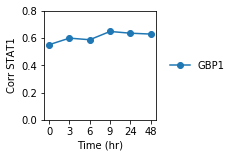

In [157]:
tf = 'STAT1'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_2.isin(@isg_genes)', engine='python').values[:, 2:].T, '-o')
plt.ylim(0, 0.8)
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.legend(moment_df.query('gene_2.isin(@isg_genes)', engine='python').gene_2.tolist(), loc='center right', frameon=False, bbox_to_anchor=(1.7, 0.5))

In [139]:
moment_df.query('gene_2.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python')

gene_1 gene_2    time_0    time_3    time_6    time_9   time_24   time_48
3097  STAT1  HLA-A  0.184255  0.275632  0.204322  0.135832  0.103195  0.100389
3118  STAT1  HLA-C  0.319793  0.405229  0.340785  0.283306  0.145822  0.176469
3119  STAT1  HLA-B  0.201227  0.302763  0.290189  0.211899  0.122095  0.082566
6662  STAT1    B2M  0.184621  0.249761  0.203064  0.147616  0.055379  0.055576

In [117]:
coef_df.query('gene_2.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python')

gene_1 gene_2  corr_coef_3  corr_coef_6  corr_coef_9  corr_coef_24  \
325  STAT1  HLA-A     0.404269     0.387095          NaN           NaN   
327  STAT1  HLA-C     0.273931     0.351479     0.211282       0.15942   
328  STAT1  HLA-B     0.381630     0.406874          NaN           NaN   
649  STAT1    B2M     0.291344     0.413924          NaN           NaN   

     corr_coef_48  
325           NaN  
327           NaN  
328           NaN  
649           NaN

In [140]:
pv_df.query('gene_2.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python')

gene_1 gene_2  corr_pval_3  corr_pval_6  corr_pval_9  corr_pval_24  \
216  STAT1  HLA-C     0.072993          NaN          NaN           NaN   

     corr_pval_48  
216           NaN

In [69]:
vals = moment_df.query('gene_2.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python').values[:, 2:]
# vals = moment_df.query('gene_2.isin(@isg_genes)', engine='python').values[:, 2:]

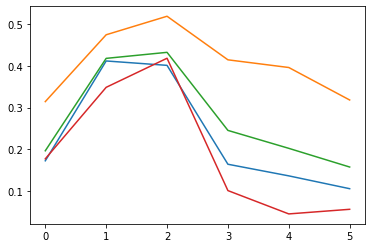

In [70]:
plt.plot(vals.T)

### Check some expresssion level over time

In [11]:
stim = 'beta'
ct = ['ciliated',]

In [12]:
subset = adata[adata.obs['cell_type'].isin(ct) & adata.obs.stim.isin(['control', stim])].copy().copy()
memento.create_groups(subset, label_columns=['time', 'donor'])
memento.compute_1d_moments(subset, min_perc_group=.9)
mean_df = memento.get_1d_moments(subset, groupby='time')[0][['gene'] + ['time_' + str(i) for i in [0, 3, 6, 9, 24, 48]]]
var_df = memento.get_1d_moments(subset, groupby='time')[1][['gene'] + ['time_' + str(i) for i in [0, 3, 6, 9, 24, 48]]]

/data/home/Github/scrna-parameter-estimation/dist/memento-0.0.4-py3.7.egg/memento/estimator.py:100: RuntimeWarning: invalid value encountered in log


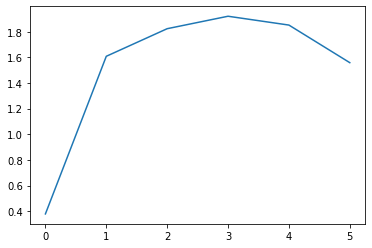

In [13]:
plt.plot(mean_df.query('gene.isin(["STAT1"])', engine='python').values[0, 1:])

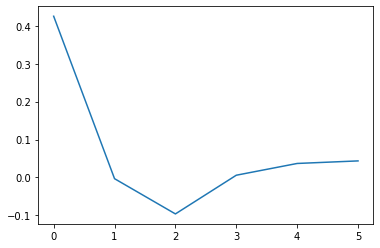

In [14]:
plt.plot(var_df.query('gene.isin(["STAT1"])', engine='python').values[0, 1:])

In [15]:
isg_genes = ['ISG15', 'MX1', 'MX2', 'ISG15', 'OAS1', 'OAS2', 'OAS3', 'OASL',]

In [16]:
isg_mat = mean_df.query('gene.isin(@isg_genes)', engine='python').values[:, 1:]

c1_mat = mean_df.query('gene.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python').values[:, 1:]
# c1_mat = c1_mat/c1_mat[:, 0].reshape(-1,1)

In [17]:
mean_df.query('gene.isin(["CREB3", "STAT1", "KLF6", "JUN"])', engine='python').values[1:].T

array([['STAT1', 'CREB3', 'KLF6'],
       [0.378761887550354, -0.5750117301940918, 1.1166375875473022],
       [1.607923150062561, -0.56675124168396, 1.3483425378799438],
       [1.8231121301651, -0.6197191476821899, 1.5926910638809204],
       [1.9202326536178589, -0.5898769497871399, 1.3491123914718628],
       [1.8513927459716797, -0.6063563823699951, 1.369952917098999],
       [1.5582482814788818, -0.5866938829421997, 1.5489485263824463]],
      dtype=object)

In [18]:
len(list(set(tfs) & set(subset.var.index)))

417

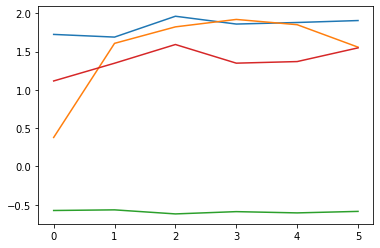

In [19]:
plt.plot(mean_df.query('gene.isin(["CREB3", "STAT1", "KLF6", "JUN"])', engine='python').values[:, 1:].T)

In [20]:
mean_df.query('gene.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python')

gene    time_0    time_3    time_6    time_9   time_24   time_48
3221  HLA-A  1.656812  2.370405  2.487690  2.090583  2.035615  1.793220
3246  HLA-C  1.829254  2.479059  2.770877  2.521157  2.434578  2.142253
3247  HLA-B  1.967847  2.673597  2.807899  2.552474  2.472788  2.166302
6974    B2M  4.189476  4.438093  4.546697  4.348129  4.342992  4.125379

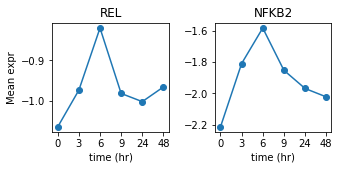

In [24]:
d = mean_df.query('gene.isin(["REL", "NFKB2"])', engine='python')
plt.figure(figsize=(5,2))
plt.subplots_adjust(wspace=0.4)
locs = [1, 2]
cs = [0, 2]
num=0
for idx, row in d.iterrows():
    plt.subplot(1,2,locs[num])
    plt.plot(row.values[1:], '-o')
    plt.title(row['gene'])
    plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
    if num == 0:
        plt.ylabel('Mean expr')
    plt.xlabel('time (hr)')
    num +=1

plt.savefig(fig_path + 'mhc_aux_mean.pdf', bbox_inches='tight')


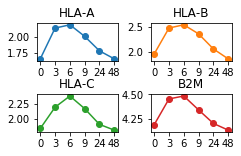

In [113]:
d = mean_df.query('gene.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python')
plt.figure(figsize=(3.5,2))
plt.subplots_adjust(wspace=0.4, hspace=0.9)
locs = [1, 3, 2, 4]
cs = [0, 2, 1, 3]
num=0
for idx, row in d.iterrows():
    plt.subplot(2,2,locs[num])
    plt.plot(row.values[1:], '-o', color='C'+str(cs[num]))
    plt.title(row['gene'])
    plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
    num +=1
plt.savefig(fig_path + 'mhc_mean_expr.pdf', bbox_inches='tight')


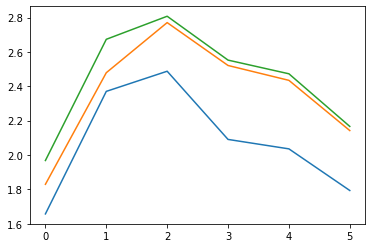

In [173]:
plt.plot(mean_df.query('gene.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python').values[:, 1:].T)

In [45]:
stim = 'beta'
ct = ['bc', 'basal', 'ciliated']

In [46]:
beta_stim = adata[adata.obs['cell_type'].isin(ct) & adata.obs.stim.isin(['control', stim])].copy().copy()

In [47]:
'LAIR1' in adata.var.index

True

([array([2333.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    8.]),
  array([3245.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.,    0.,    0.,    0.,    7.])],
 array([0.        , 0.06666667, 0.13333334, 0.2       , 0.26666668,
        0.33333334, 0.4       , 0.46666667, 0.53333336, 0.6       ,
        0.6666667 , 0.73333335, 0.8       , 0.8666667 , 0.93333334,
        1.        ], dtype=float32),
 <a list of 2 Lists of Patches objects>)

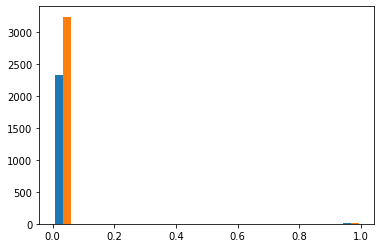

In [48]:
plt.hist([
    beta_stim[beta_stim.obs.time == '0', :][:, 'LAIR1'].X.todense().A1, 
    beta_stim[beta_stim.obs.time == '3', :][:, 'LAIR1'].X.todense().A1],
    bins=15)
# plt.hist(adata[adata.obs.time == '3', :][:, 'NLRC5'].X.todense().A1, bins=15)

In [62]:
df.query('gene.isin(["NLRC5"])', engine='python')

gene    time_0    time_3    time_6    time_9   time_24   time_48
7798  NLRC5 -2.844202 -1.290465 -0.997472 -0.961713 -0.956975 -0.941885

In [63]:
df.query('gene.isin(["HLA-A", "HLA-B", "HLA-C", "B2M"])', engine='python')

gene    time_0    time_3    time_6    time_9   time_24   time_48
3342  HLA-A  1.656812  2.370405  2.487690  2.090583  2.035615  1.793220
3367  HLA-C  1.829254  2.479059  2.770877  2.521157  2.434578  2.142253
3368  HLA-B  1.967847  2.673597  2.807899  2.552474  2.472788  2.166302
7264    B2M  4.189476  4.438093  4.546697  4.348129  4.342992  4.125379

### Correlation of MHC I transcripts to canonical TFs

In [ ]:

cts = [['ciliated']]
tps = ['3', '6', '9', '24', '48']
stims = ['alpha', 'beta', 'gamma', 'lambda']


for ct in cts:
    for tp in tps:
        for stim in stims:
            
#             fname = '{}_{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp, tf)
#             if fname in done_files:
#                 continue
                            
            print('starting', ct, tp, stim)

            adata_stim = adata.copy()[
                adata.obs.cell_type.isin(ct) & \
                adata.obs.stim.isin(['control', stim]) & \
                adata.obs.time.isin(['0',tp]), :].copy()
            time_converter={0:0, int(tp):1}
            adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

            memento.create_groups(adata_stim, label_columns=['time_step', 'donor'])
            memento.compute_1d_moments(adata_stim, min_perc_group=.9)
            
            tf_list = list(set(tfs) & set(adata_stim.var.index))
            
            gene_list = adata_stim.var.index.tolist()
            
            memento.compute_2d_moments(adata_stim, list(itertools.product(tf_list, ["HLA-A", "HLA-B", "HLA-C", "B2M"])))

            moment_df = memento.get_2d_moments(adata_stim, groupby='time_step')
            moment_df.to_csv('/data_volume/ifn_hbec/tf_test/moments_{}_{}_{}_mhc1.csv'.format('-'.join(ct), stim, tp), index=False)


            memento.ht_2d_moments( 
                adata_stim, 
                formula_like='1 + time_step',
                cov_column='time_step', 
                num_boot=10000, 
                verbose=1,
                num_cpus=13)

            if 'mv_regressor' in adata_stim.uns['memento']:
                del adata_stim.uns['memento']['mv_regressor']
            adata_stim.write('/data_volume/ifn_hbec/tf_test/{}_{}_{}_mhc1.h5ad'.format('-'.join(ct), stim, tp))

In [75]:
stim = 'beta'
ct = ['ciliated']
for tp in ['3', '6', '9', '24', '48']:
    
    print(tp)

    
#     moments = memento.get_2d_moments(adata_result, groupby='time_step').rename(columns={'time_step_0':'time_0', 'time_step_1':'time_'+tp})
    moments = pd.read_csv('/data_volume/ifn_hbec/tf_test/moments_{}_{}_{}_mhc1.csv'.format('-'.join(ct), stim, tp)).rename(columns={'time_step_0':'time_0', 'time_step_1':'time_'+tp})
    res_df = memento.get_2d_ht_result(adata_result)\
        .rename(columns={
            'corr_coef':'corr_coef' + '_' + tp,
            'corr_pval':'corr_pval' + '_' + tp})
    
    if tp == '3':

        pv_df = res_df[['gene_1', 'gene_2', 'corr_pval' + '_' + tp]].copy()
        coef_df = res_df[['gene_1', 'gene_2', 'corr_coef' + '_' + tp]].copy()
        moment_df = moments[['gene_1', 'gene_2', 'time_0', 'time_3']].copy()
        
    else:
        
        pv_df = pv_df.merge(res_df[['gene_1', 'gene_2', 'corr_pval' + '_' + tp]].copy(), on=['gene_1', 'gene_2'], how='outer')
        coef_df = coef_df.merge(res_df[['gene_1', 'gene_2', 'corr_coef' + '_' + tp]].copy(), on=['gene_1', 'gene_2'], how='outer')
        moment_df = moment_df.merge(moments[['gene_1', 'gene_2', 'time_{}'.format(tp)]].copy(), on=['gene_1', 'gene_2'], how='outer')
    
    
    

3
6
9
24
48


### Hunt for some relevant TFs

In [25]:
stim = 'beta'
tp = '48'
ct = ['ciliated']

fname = '/data_volume/ifn_hbec/tf_test/{}_{}_{}_mhc1.h5ad'.format('-'.join(ct), stim, tp)
adata_result = sc.read(fname)

In [26]:

fname = '/data_volume/ifn_hbec/tf_test/{}_{}_{}_mhc1.h5ad'.format('-'.join(ct), stim, tp)
adata_result = sc.read(fname)

moments = pd.read_csv('/data_volume/ifn_hbec/tf_test/moments_{}_{}_{}_mhc1.csv'.format('-'.join(ct), stim, tp)).rename(columns={'time_step_0':'time_0', 'time_step_1':'time_'+tp})
res_df = memento.get_2d_ht_result(adata_result)
# rel_res_df = memento.get_2d_ht_result(adata_stim)

In [27]:
wired_pairs = moments.query('time_0 > 0.4 | time_{} > 0.4'.format(tp))

In [28]:
filtered_res_df = res_df.merge(wired_pairs, on=['gene_1', 'gene_2'])
filtered_res_df['corr_fdr'] = memento.util._fdrcorrect(filtered_res_df['corr_pval'])

In [29]:
pd.set_option('display.max_rows', 500)


In [30]:
filtered_res_df.query('corr_fdr < 0.1 & corr_coef > 0')

gene_1 gene_2  corr_coef   corr_se  corr_pval    time_0   time_48  corr_fdr
32  BARX2    B2M   0.468011  0.191003   0.032297  0.196546  0.406067  0.094991

In [31]:
filtered_res_df.query('corr_fdr < 0.05 & corr_coef > 0')

Empty DataFrame
Columns: [gene_1, gene_2, corr_coef, corr_se, corr_pval, time_0, time_48, corr_fdr]
Index: []

In [32]:
res_df

gene_1 gene_2  corr_coef   corr_se  corr_pval
0      FOXA1  HLA-A  -0.056048  0.138552   0.672333
1      FOXA1  HLA-B  -0.017892  0.120553   0.886911
2      FOXA1  HLA-C  -0.039600  0.137438   0.766823
3      FOXA1    B2M  -0.067997  0.115958   0.542846
4       ELF3  HLA-A  -0.036777  0.079008   0.646335
...      ...    ...        ...       ...        ...
1595    KLF2    B2M   0.047859  0.080182   0.540046
1596  ZBTB11  HLA-A   0.548664  0.214973   0.015998
1597  ZBTB11  HLA-B   0.549160  0.218291   0.024098
1598  ZBTB11  HLA-C   0.008946  0.237385   0.965903
1599  ZBTB11    B2M   0.184607  0.212982   0.360264

[1600 rows x 5 columns]

In [33]:
moments.query('gene_2.str.startswith("HLA-")', engine='python')

gene_1 gene_2    time_0   time_48
0      FOXA1  HLA-A -0.010951 -0.036042
1      FOXA1  HLA-B -0.105736 -0.113746
2      FOXA1  HLA-C -0.110515 -0.128243
4       ELF3  HLA-A  0.221549  0.205085
5       ELF3  HLA-B  0.234490  0.230563
...      ...    ...       ...       ...
1593    KLF2  HLA-B -0.076569 -0.043462
1594    KLF2  HLA-C  0.059468  0.079675
1596  ZBTB11  HLA-A -0.097915  0.147713
1597  ZBTB11  HLA-B -0.075090  0.170759
1598  ZBTB11  HLA-C  0.007722  0.011727

[1200 rows x 4 columns]

### Check correlations to other TFs over time

In [34]:
stim = 'beta'
ct = ['ciliated']
tf = 'STAT1'

In [35]:

for tp in ['3', '6', '9', '24', '48']:
    
    print(tp)

    fname = '/data_volume/ifn_hbec/tf_test/{}_{}_{}_mhc1.h5ad'.format('-'.join(ct), stim, tp)
    adata_result = sc.read(fname)
    
#     moments = memento.get_2d_moments(adata_result, groupby='time_step').rename(columns={'time_step_0':'time_0', 'time_step_1':'time_'+tp})
    moments = pd.read_csv('/data_volume/ifn_hbec/tf_test/moments_{}_{}_{}_mhc1.csv'.format('-'.join(ct), stim, tp)).rename(columns={'time_step_0':'time_0', 'time_step_1':'time_'+tp})
    res_df = memento.get_2d_ht_result(adata_result)\
        .rename(columns={
            'corr_coef':'corr_coef' + '_' + tp,
            'corr_pval':'corr_pval' + '_' + tp})
    
    if tp == '3':

        pv_df = res_df[['gene_1', 'gene_2', 'corr_pval' + '_' + tp]].copy()
        coef_df = res_df[['gene_1', 'gene_2', 'corr_coef' + '_' + tp]].copy()
        moment_df = moments[['gene_1', 'gene_2', 'time_0', 'time_3']].copy()
        
    else:
        
        pv_df = pv_df.merge(res_df[['gene_1', 'gene_2', 'corr_pval' + '_' + tp]].copy(), on=['gene_1', 'gene_2'], how='outer')
        coef_df = coef_df.merge(res_df[['gene_1', 'gene_2', 'corr_coef' + '_' + tp]].copy(), on=['gene_1', 'gene_2'], how='outer')
        moment_df = moment_df.merge(moments[['gene_1', 'gene_2', 'time_{}'.format(tp)]].copy(), on=['gene_1', 'gene_2'], how='outer')
    
    
    

3
6
9
24
48


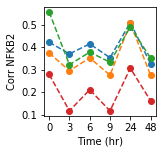

In [40]:
tf = 'NFKB2'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.savefig(fig_path + 'mhc_corr_NFKB2.pdf', bbox_inches='tight')


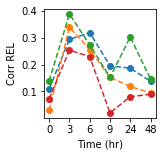

In [41]:
tf = 'REL'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.savefig(fig_path + 'mhc_corr_REL.pdf', bbox_inches='tight')


Text(0, 0.5, 'Corr RFX5')

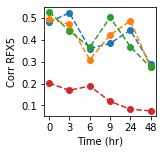

In [38]:
tf = 'RFX5'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))

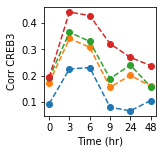

In [121]:
tf = 'CREB3'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.savefig(fig_path + 'mhc_creb3_corr.pdf', bbox_inches='tight')

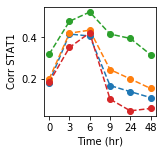

In [122]:
tf = 'STAT1'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '--o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.savefig(fig_path + 'mhc_stat1_corr.pdf', bbox_inches='tight')

In [242]:
tf = 'CREB3'

In [243]:
moment_df.query('gene_1 == "{}"'.format(tf))

gene_1 gene_2    time_0    time_3    time_6    time_9   time_24   time_48
828  CREB3  HLA-A  0.092283  0.225511  0.230557  0.079328  0.065209  0.104553
829  CREB3  HLA-B  0.172263  0.341903  0.307946  0.155191  0.201031  0.159479
830  CREB3  HLA-C  0.190355  0.365602  0.330579  0.188595  0.240382  0.157265
831  CREB3    B2M  0.193022  0.443010  0.429344  0.321969  0.269825  0.238096

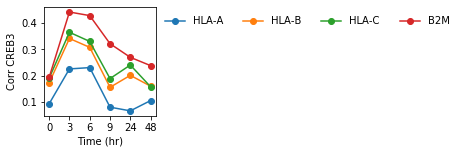

In [244]:
tf = 'CREB3'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '-o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))
plt.legend(['HLA-A', 'HLA-B', 'HLA-C', 'B2M'], ncol=4, frameon=False, bbox_to_anchor=(1,1))

Text(0, 0.5, 'Corr STAT6')

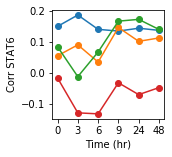

In [245]:
tf = 'STAT6'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '-o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))

Text(0, 0.5, 'Corr JUND')

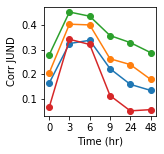

In [246]:
tf = 'JUND'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '-o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))

Text(0, 0.5, 'Corr ETS2')

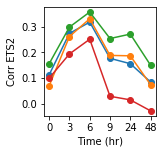

In [249]:
tf = 'ETS2'
plt.figure(figsize=(2,2))
plt.plot(moment_df.query('gene_1 == "{}"'.format(tf)).values[:, 2:].T, '-o')
plt.xticks([0, 1, 2, 3, 4, 5], ['0', '3', '6', '9', '24', '48'])
plt.xlabel('Time (hr)'); plt.ylabel('Corr {}'.format(tf))

### ISG DC analysis - "positive" control

In [ ]:

cts = [['ciliated']]
tps = ['3', '6', '9', '24', '48']
stims = ['alpha', 'beta', 'gamma', 'lambda']


for ct in cts:
    for tp in tps:
        for stim in stims:
            
#             fname = '{}_{}_{}_{}.h5ad'.format('-'.join(ct), stim, tp, tf)
#             if fname in done_files:
#                 continue
                            
            print('starting', ct, tp, stim)

            adata_stim = adata.copy()[
                adata.obs.cell_type.isin(ct) & \
                adata.obs.stim.isin(['control', stim]) & \
                adata.obs.time.isin(['0',tp]), :].copy()
            time_converter={0:0, int(tp):1}
            adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

            memento.create_groups(adata_stim, label_columns=['time_step', 'donor'])
            memento.compute_1d_moments(adata_stim, min_perc_group=.9)
            
            tf_list = list(set(tfs) & set(adata_stim.var.index))
            
            gene_list = adata_stim.var.index.tolist()
            
            memento.compute_2d_moments(adata_stim, list(itertools.product(tf_list, ["HLA-A", "HLA-B", "HLA-C", "B2M"])))

            moment_df = memento.get_2d_moments(adata_stim, groupby='time_step')
            moment_df.to_csv('/data_volume/ifn_hbec/tf_test/moments_{}_{}_{}_mhc1.csv'.format('-'.join(ct), stim, tp), index=False)


            memento.ht_2d_moments( 
                adata_stim, 
                formula_like='1 + time_step',
                cov_column='time_step', 
                num_boot=10000, 
                verbose=1,
                num_cpus=13)

            if 'mv_regressor' in adata_stim.uns['memento']:
                del adata_stim.uns['memento']['mv_regressor']
            adata_stim.write('/data_volume/ifn_hbec/tf_test/{}_{}_{}_mhc1.h5ad'.format('-'.join(ct), stim, tp))

### CHIP analysis

In [36]:
tf = 'STAT1'
ct = ['ciliated']
stim = 'beta'

def get_2d_moments_ht(tf, ct, stim):
    
    adata_stim = adata.copy()[
        adata.obs.cell_type.isin(ct) & \
        adata.obs.time.isin(['0', '3']) & \
        adata.obs.stim.isin(['control', stim])].copy()
    time_converter={0:0, int('3'):1}
    adata_stim.obs['time_step'] = adata_stim.obs['time'].astype(int).apply(lambda x: time_converter[x])

    memento.create_groups(adata_stim, label_columns=['time_step', 'donor'])
    memento.compute_1d_moments(adata_stim, min_perc_group=.9)
    moment_1d_df = memento.get_1d_moments(adata_stim, groupby='time_step')

    memento.compute_2d_moments(adata_stim, list(itertools.product([tf], adata_stim.var.index)))

    moment_df = memento.get_2d_moments(adata_stim, groupby='time_step')
    
    memento.ht_2d_moments( 
        adata_stim, 
        formula_like='1 + time_step',
        cov_column='time_step', 
        num_boot=10000, 
        verbose=1,
        num_cpus=13)
    
    ht_df = memento.get_2d_ht_result(adata_stim)
    
    return moment_df, ht_df

In [37]:
beta_df, beta_ht_df = get_2d_moments_ht(tf, ct, stim)

[Parallel(n_jobs=13)]: Using backend LokyBackend with 13 concurrent workers.
[Parallel(n_jobs=13)]: Done  24 tasks      | elapsed:    9.3s
[Parallel(n_jobs=13)]: Done 174 tasks      | elapsed:   35.5s
[Parallel(n_jobs=13)]: Done 424 tasks      | elapsed:  1.3min
[Parallel(n_jobs=13)]: Done 774 tasks      | elapsed:  2.4min
[Parallel(n_jobs=13)]: Done 1224 tasks      | elapsed:  3.6min
[Parallel(n_jobs=13)]: Done 1774 tasks      | elapsed:  5.2min
[Parallel(n_jobs=13)]: Done 2424 tasks      | elapsed:  7.1min
[Parallel(n_jobs=13)]: Done 3174 tasks      | elapsed:  9.2min
[Parallel(n_jobs=13)]: Done 4024 tasks      | elapsed: 11.6min
[Parallel(n_jobs=13)]: Done 4974 tasks      | elapsed: 14.3min
[Parallel(n_jobs=13)]: Done 6024 tasks      | elapsed: 17.3min
[Parallel(n_jobs=13)]: Done 7174 tasks      | elapsed: 20.6min
[Parallel(n_jobs=13)]: Done 8424 tasks      | elapsed: 24.2min
[Parallel(n_jobs=13)]: Done 9641 out of 9641 | elapsed: 27.6min finished


In [39]:
beta_ht_df['isgf3'] = beta_ht_df.gene_2.apply(lambda x: 'in TSS' if x in isgf3_genes else 'rest')

In [40]:
beta_ht_df.head(5)

gene_1     gene_2  corr_coef   corr_se  corr_pval   isgf3
0  STAT1  LINC01409  -0.232706  0.272895   0.398760    rest
1  STAT1      NOC2L  -0.026243  0.215634   0.892411    rest
2  STAT1       HES4   0.299789  0.093080   0.002000    rest
3  STAT1      ISG15  -0.064089  0.070980   0.360664  in TSS
4  STAT1       AGRN  -0.012531  0.166157   0.937506    rest

No handles with labels found to put in legend.


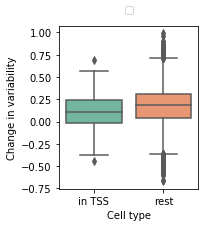

In [41]:
plt.figure(figsize=(2.5, 3))
sns.boxplot(x='isgf3', y='corr_coef', data=beta_ht_df.sort_values('isgf3'), palette='Set2')

plt.xlabel('Cell type'); plt.ylabel('Change in variability');
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.15))
# plt.ylim(-.8, 0.6)
# plt.savefig(fig_path + 'isgf3_vs_rest.pdf', bbox_inches='tight')

